In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm

# Escolha e limpeza da base de dados

Escolhida a base de dados que contém resultado do IDEB, disponibilizada pelo Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira (Inep). Disponível em: https://www.gov.br/inep/pt-br/areas-de-atuacao/pesquisas-estatisticas-e-indicadores/ideb/resultados. Acesso em: 8 mar 2025.

Indicadores educacionais compostos por: Taxa de Aprovação, SAEB e IDEB nos anos de 2017, 2019, 20211 e 2023 e Metas do 1º ciclo do Ideb2,3. Os dados estão dimensionados por município e organizados por rede de ensino.

A base de dados está armazenada em: dados/divulgacao_ensino_medio_municipios_2023/divulgacao_ensino_medio_municipios_2023.xlsx.
																				
Limpeza feita nos arquivos com os seguintes passos:

- Ignoradas as 9 primeiras linhas e as 14 últimas linhas.
- Padronizado os valores '-' e 'ND' como valores NA.

In [78]:
# Read the Excel file starting from row 10 (skip first 9 rows)
df = pd.read_excel(r'https://github.com/joaoleao83/notebook_joao_leao/blob/master/dados/divulgacao_ensino_medio_municipios_2023/divulgacao_ensino_medio_municipios_2023.xlsx?raw=true', 
                   skiprows=9, skipfooter=14, na_values=['-','ND'])

# Display the first few rows of the dataframe
df.head(10)

#df.tail(10)

,SG_UF,CO_MUNICIPIO,NO_MUNICIPIO,REDE,VL_APROVACAO_2017_SI_4,VL_APROVACAO_2017_1,VL_APROVACAO_2017_2,VL_APROVACAO_2017_3,VL_APROVACAO_2017_4,VL_INDICADOR_REND_2017,...,VL_NOTA_MEDIA_2021,VL_NOTA_MATEMATICA_2023,VL_NOTA_PORTUGUES_2023,VL_NOTA_MEDIA_2023,VL_OBSERVADO_2017,VL_OBSERVADO_2019,VL_OBSERVADO_2021,VL_OBSERVADO_2023,VL_PROJECAO_2019,VL_PROJECAO_2021
0,RO,1100015,Alta Floresta D'Oeste,Estadual,88.1,85.0,90.4,90.4,NaN,0.885253,...,4.326666,274.69,273.68,4.644526,3.9,4.5,3.9,4.5,4.1,4.3
1,RO,1100015,Alta Floresta D'Oeste,Pública,88.1,85.0,90.4,90.4,NaN,0.885253,...,4.326666,274.69,273.68,4.644526,3.9,4.5,3.9,4.5,4.1,4.3
2,RO,1100023,Ariquemes,Estadual,82.6,77.9,83.0,91.7,NaN,0.838216,...,4.437153,269.37,271.11,4.531334,3.8,3.9,4.1,4.1,4.0,4.2
3,RO,1100023,Ariquemes,Federal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RO,1100023,Ariquemes,Pública,84.7,80.3,85.1,92.8,81.8,0.847368,...,4.437153,272.01,274.56,4.620059,3.8,4.0,3.9,4.2,4.0,4.2
5,RO,1100031,Cabixi,Estadual,94.9,92.9,94.7,100.0,NaN,0.957734,...,4.283235,262.44,256.32,4.212595,3.7,NaN,4.1,4.1,3.9,4.1
6,RO,1100031,Cabixi,Pública,94.9,92.9,94.7,100.0,NaN,0.957734,...,4.283235,262.44,256.32,4.212595,3.7,NaN,4.1,4.1,3.9,4.1
7,RO,1100049,Cacoal,Estadual,89.1,84.9,91.1,93.1,NaN,0.895612,...,4.508396,262.62,260.23,4.273656,3.7,4.1,4.2,3.9,3.9,4.2
8,RO,1100049,Cacoal,Federal,97.4,95.7,98.5,100.0,NaN,0.980341,...,NaN,301.01,305.36,5.488440,5.1,5.9,NaN,5.4,5.3,5.5
9,RO,1100049,Cacoal,Pública,90.2,86.6,92.3,93.7,NaN,0.907607,...,4.508396,270.03,268.93,4.507969,3.9,4.4,4.2,4.2,4.1,4.3


# Exibindo as variáveis disponíveis na amostra

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11721 entries, 0 to 11720
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SG_UF                    11721 non-null  object 
 1   CO_MUNICIPIO             11721 non-null  int64  
 2   NO_MUNICIPIO             11721 non-null  object 
 3   REDE                     11721 non-null  object 
 4   VL_APROVACAO_2017_SI_4   11259 non-null  float64
 5   VL_APROVACAO_2017_1      11217 non-null  float64
 6   VL_APROVACAO_2017_2      11244 non-null  float64
 7   VL_APROVACAO_2017_3      11253 non-null  float64
 8   VL_APROVACAO_2017_4      1974 non-null   float64
 9   VL_INDICADOR_REND_2017   11256 non-null  float64
 10  VL_APROVACAO_2019_SI_4   11473 non-null  float64
 11  VL_APROVACAO_2019_1      11467 non-null  float64
 12  VL_APROVACAO_2019_2      11468 non-null  float64
 13  VL_APROVACAO_2019_3      11473 non-null  float64
 14  VL_APROVACAO_2019_4   

# Identificando o tipo de cada variável (qualitativa nominal, qualitativa ordinal, quantitativa discreta ou quantitativa contínua)

## Qualitativas nominais

- SG_UF
- CO_MUNICIPIO (apesar de ser identificado como int64, há uma codificação específica para cada município, de modo que é possível considerar como uma variável qualitativa nominal. Sendo assim é recomendável a mudança do tipo)
- NO_MUNICIPIO
- REDE 

## Quantitativas contínuas

- Todas as demais variáveis são quantitativas contínuas, pois se referem a notas obtidas (desempenho escolar)

## Convertendo as colunas SG_UF, COD_MUN, NO_MUNICIPIO, REDE para o tipo 'category' (variável qualitativa nominal)

In [10]:
df['SG_UF'] = df['SG_UF'].astype('category')
df['CO_MUNICIPIO'] = df['CO_MUNICIPIO'].astype('category')
df['NO_MUNICIPIO'] = df['NO_MUNICIPIO'].astype('category')
df['REDE'] = df['REDE'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11721 entries, 0 to 11720
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   SG_UF                    11721 non-null  category
 1   CO_MUNICIPIO             11721 non-null  category
 2   NO_MUNICIPIO             11721 non-null  category
 3   REDE                     11721 non-null  category
 4   VL_APROVACAO_2017_SI_4   11259 non-null  float64 
 5   VL_APROVACAO_2017_1      11217 non-null  float64 
 6   VL_APROVACAO_2017_2      11244 non-null  float64 
 7   VL_APROVACAO_2017_3      11253 non-null  float64 
 8   VL_APROVACAO_2017_4      1974 non-null   float64 
 9   VL_INDICADOR_REND_2017   11256 non-null  float64 
 10  VL_APROVACAO_2019_SI_4   11473 non-null  float64 
 11  VL_APROVACAO_2019_1      11467 non-null  float64 
 12  VL_APROVACAO_2019_2      11468 non-null  float64 
 13  VL_APROVACAO_2019_3      11473 non-null  float64 
 14  VL_APR

# Exibindo a distribuição de frequência de cada variável qualitativa

In [11]:
print(df['SG_UF'].value_counts())

print(df['REDE'].value_counts())

print(df['NO_MUNICIPIO'].value_counts())

print(df['CO_MUNICIPIO'].value_counts())

SG_UF
MG    1778
SP    1344
RS    1042
BA     881
PR     825
SC     626
GO     521
PI     466
PB     466
MA     465
PE     386
CE     385
RN     351
PA     306
MT     300
TO     282
RJ     216
AL     210
ES     177
MS     167
SE     156
AM     138
RO     112
AC      49
AP      36
RR      33
DF       3
Name: count, dtype: int64
REDE
Estadual     5559
Pública      5559
Federal       500
Municipal     103
Name: count, dtype: int64
NO_MUNICIPIO
Bom Jesus       11
Santa Inês      10
São Domingos    10
Santa Luzia     10
Bonito           9
                ..
Guareí           2
Guarda-Mor       2
Guaraíta         2
Guaraí           2
Óleo             2
Name: count, Length: 5287, dtype: int64
CO_MUNICIPIO
3550308    4
2925303    4
5218300    4
4300406    4
4314902    4
          ..
2911907    2
2911857    2
2911808    2
2911659    2
3146404    2
Name: count, Length: 5559, dtype: int64


# Identificando possíveis desbalanceamentos de sua amostra

Pela frequências exibidas, é possível perceber que: 

1) há Estados com maior quantidade de escolas pesquisadas em detrimento a outros; 
2) a grande parte das escolas pertencem à rede Estadual;
3) alguns municípios têm mais escolas pesquisadas, como é o cado de Bom Jesus, com 11 escolas.

## Exibindo o desbalanceamento na frequência dos Estados pesquisados

Pelos gráficos a seguir, é possível inferir que alguns poucos Estados, tais como MG, SP, RS, BA e PR, possuem maior parte das escolas representadas (50% da frequência total), o que indica um desbalanceamento no quantitativo de escolas por Estado pesquisado.

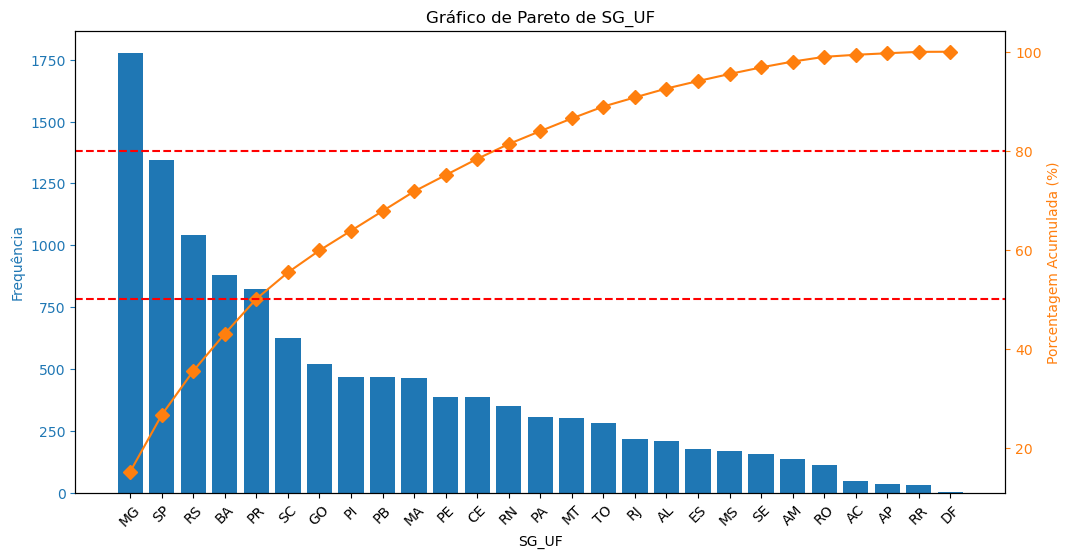

In [12]:
col = 'SG_UF'

# Compute the frequency counts of the variable and sort them in descending order
counts = df[col].value_counts().sort_values(ascending=False)
cumulative_percentage = counts.cumsum() / counts.sum() * 100

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for frequency counts
ax1.bar(counts.index.astype(str), counts, color='C0')
ax1.set_xlabel(col)
ax1.set_ylabel('Frequência', color='C0')
ax1.tick_params('y', colors='C0')
plt.xticks(rotation=45)

# Cumulative percentage line using a secondary axis
ax2 = ax1.twinx()
ax2.plot(counts.index.astype(str), cumulative_percentage, color='C1', marker="D", ms=7)
ax2.set_ylabel('Porcentagem Acumulada (%)', color='C1')
ax2.tick_params('y', colors='C1')
ax2.axhline(80, color='red', linestyle='dashed')  # Optional: linha de referência dos 80%
ax2.axhline(50, color='red', linestyle='dashed')  # Optional: linha de referência dos 50%

plt.title(f'Gráfico de Pareto de {col}')
plt.show()

## Exibindo as mesmas frequênicas pelo gráfico do tipo pizza

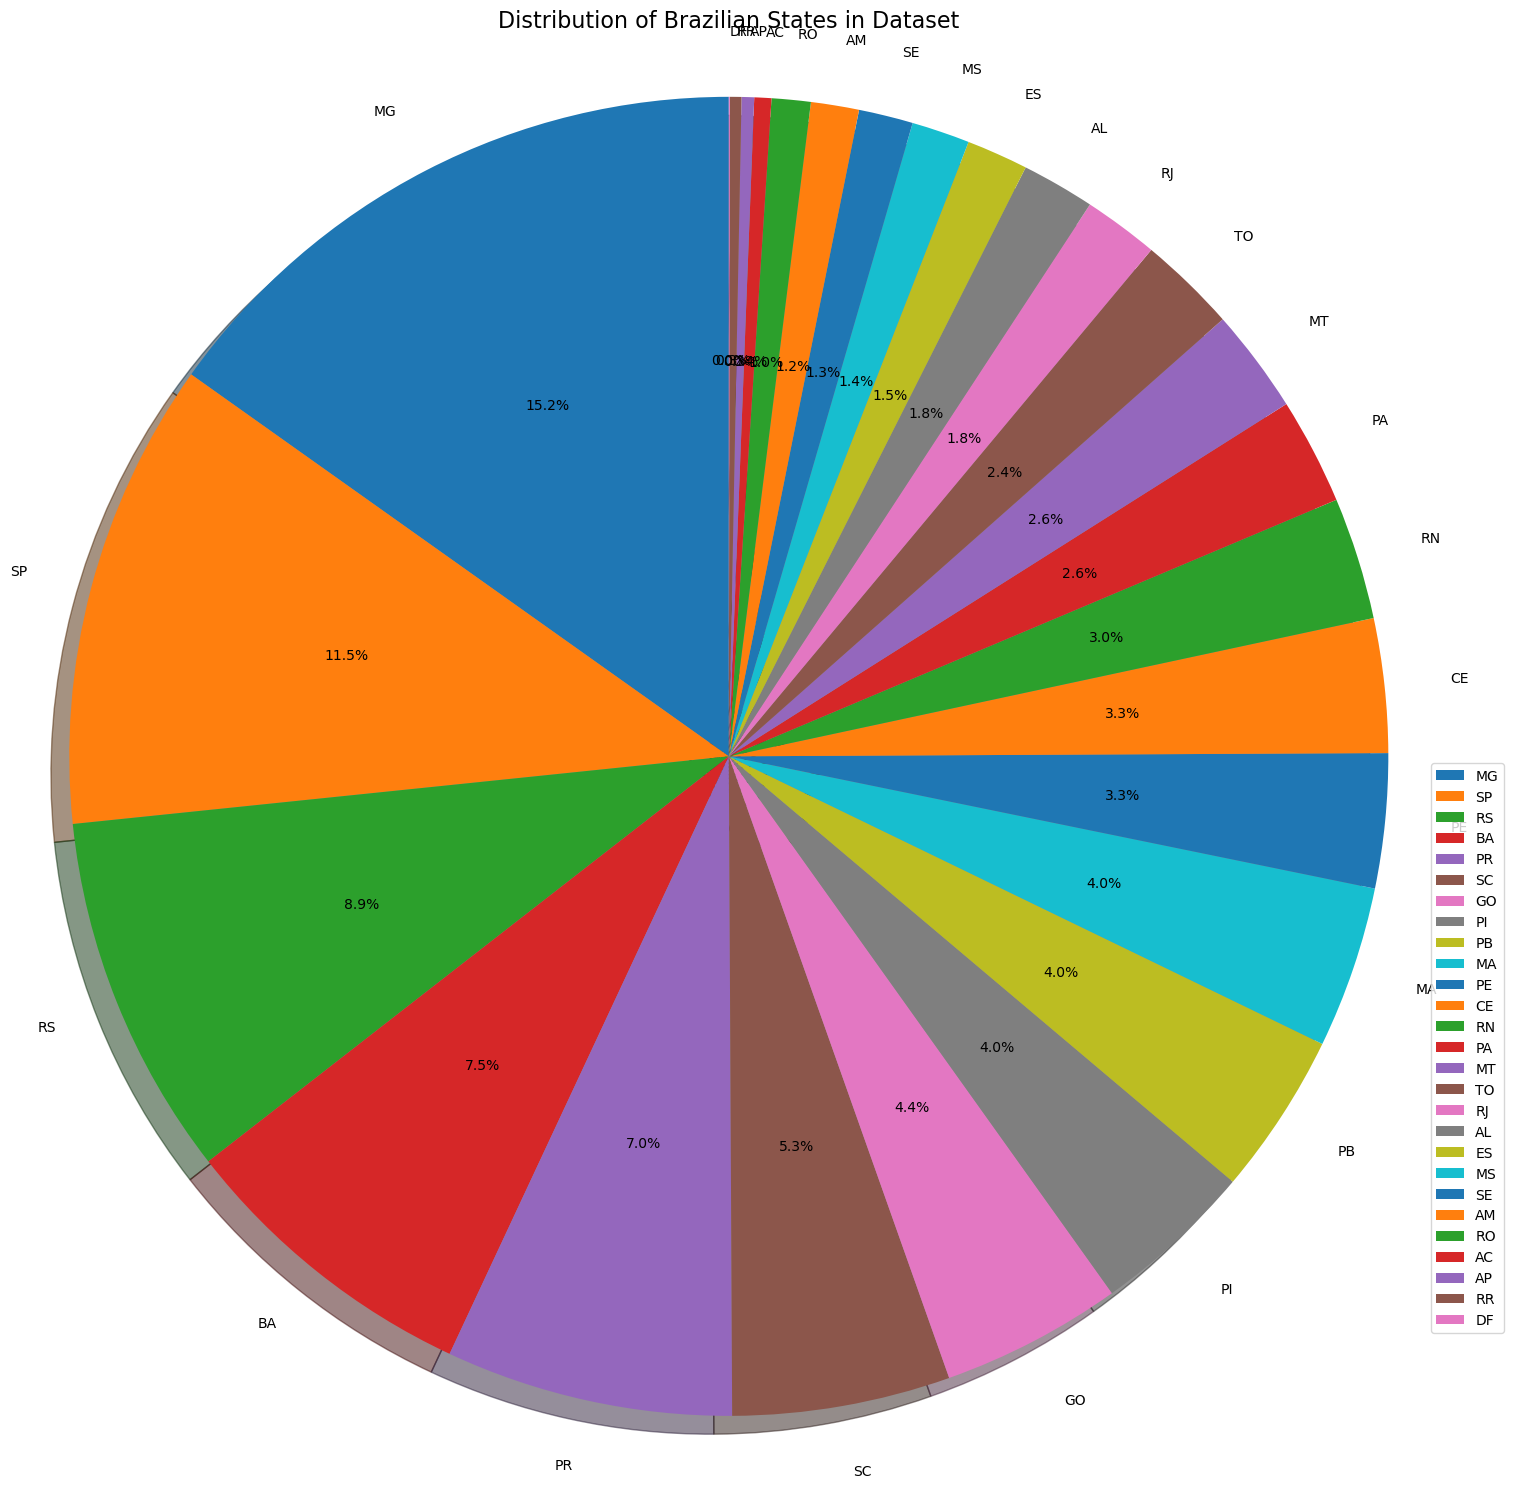

In [13]:
# Create a pie chart for SG_UF distribution
plt.figure(figsize=(15, 15))

# Count state frequencies
state_counts = df['SG_UF'].value_counts()

# Create pie chart with percentages
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', 
    shadow=True, startangle=90)

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')

# Add title
plt.title('Distribution of Brazilian States in Dataset', fontsize=16)

# Add legend with state codes for better readability
plt.legend(state_counts.index, loc="best", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

# Escolhedo uma variável quantitativa para análise e aplicando filtro

A variável VL_OBSERVADO_2023, referente ao desempenho IDEB do ano de 2023, foi a escolhida, para melhor representação foi feito um filtro para exibir apenas os registros nos quais a rede seja PÚBLICA, haja vista que abrange as demais redes, quais sejam: municipal, estadual e federal.

Também foram descartados os valores nulos (aplicação da função dropna), que são dados não coletados ou perdidos.

## Apresentado o histograma da variável VL_OBSERVADO_2023 com descarte dos dados não disponíveis (NA, em inglês)

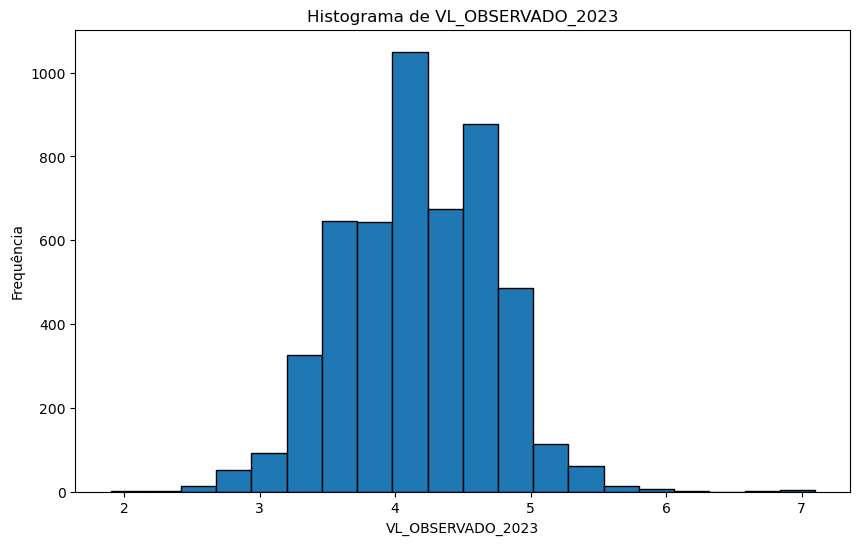

In [14]:
col = 'VL_OBSERVADO_2023'

df = df[df['REDE'] == 'Pública']

plt.figure(figsize=(10, 6))
plt.hist(df[col].dropna(), bins=20, edgecolor='black')
plt.title(f'Histograma de {col}')
plt.xlabel(col)
plt.ylabel('Frequência')
plt.show()

## Apresentado a curva KDE da variável VL_OBSERVADO_2023 com descarte dos dados não disponíveis (NA, em inglês)

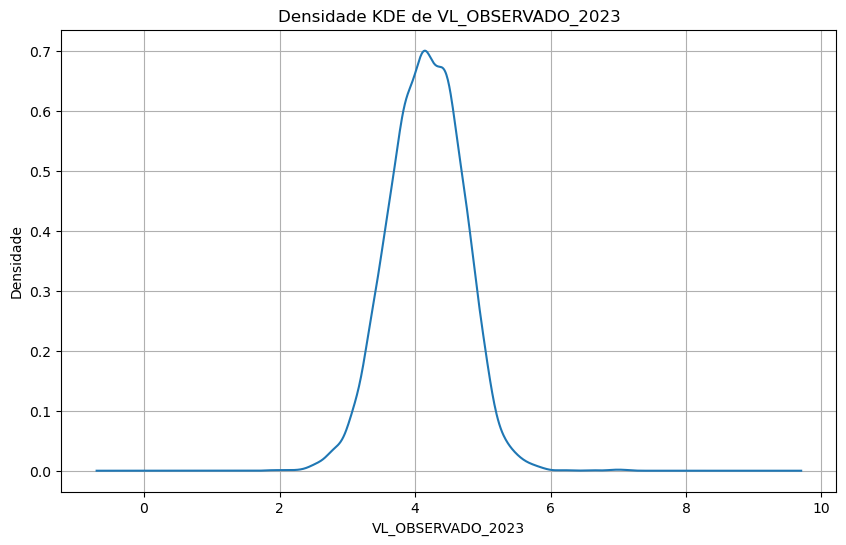

In [15]:
plt.figure(figsize=(10, 6))
df[col].plot(kind='kde')
plt.title('Densidade KDE de ' + col)
plt.xlabel(col)
plt.ylabel('Densidade')
plt.grid(True)
plt.show()

# Apresentando a moda, a média e a mediana da variável VL_OBSERVADO_2023

In [17]:
print('Média: ' + str(df[col].dropna().mean()))

print('Moda: ' + str(df[col].dropna().mode()))

print('Mediana: ' + str(df[col].dropna().median()))

Média: 4.1604343534057255
Moda: 0    4.1
Name: VL_OBSERVADO_2023, dtype: float64
Mediana: 4.2


# Conclusões a partir das medidas de centralidade

A pequena diferença entre média, mediana e moda dos valores do IDEB 2023 indica uma distribuição aproximadamente simétrica dos dados. Essa similaridade sugere que:

1. A distribuição dos resultados do IDEB segue um padrão próximo à normalidade
2. Não há forte assimetria ou distorção causada por valores extremos (outliers)
3. As três medidas de tendência central convergem para um valor representativo da amostra
4. O valor central pode ser considerado um bom indicador do desempenho típico das escolas públicas

Esta concentração das medidas de centralidade em valores próximos também sugere certa homogeneidade nos resultados educacionais medidos, com a maioria das escolas apresentando desempenho semelhante, agrupado em torno desta centralidade.

In [19]:
df[col].dropna().describe()

count    5065.000000
mean        4.160434
std         0.541499
min         1.900000
25%         3.800000
50%         4.200000
75%         4.500000
max         7.100000
Name: VL_OBSERVADO_2023, dtype: float64

## Apresentando também as médias geométrica e harmônica, discorrendo a respeito de qual delas apresenta uma melhor informação acerca da amostra.




In [21]:
print('Média geométrica: ' + str(round(stats.gmean(df[col].dropna()), 2)))
print('Média harmônica: ' + str(round(stats.hmean(df[col].dropna()), 2)))

Média geométrica: 4.12
Média harmônica: 4.09


# Comparação entre Média Geométrica e Média Harmônica

A média geométrica (3.74) apresenta um valor mais próximo das medidas de centralidade já calculadas (média aritmética, mediana e moda), o que a torna mais representativa para esta distribuição. 

A média harmônica (3.66) resultou em um valor ligeiramente menor, o que é esperado, pois ela tende a ser mais influenciada pelos valores menores na distribuição.

A média geométrica é mais adequada neste contexto de avaliação educacional porque:
- Captura melhor o comportamento central dos dados quando há variações moderadas
- Penaliza menos os valores extremos inferiores do que a média harmônica
- Representa melhor dados que têm natureza multiplicativa ou de crescimento proporcional, como é o caso de indicadores educacionais ao longo do tempo

Para o IDEB, que representa um produto entre taxa de aprovação e desempenho em avaliações, a média geométrica oferece uma interpretação mais coerente com a natureza do próprio índice.

A média geométrica apresentou um valor mais próximo das medidas de centralidade (média, mediana e moda), o que sugere está mais consentânea como medida de centralidade da amostra.

# Exibindo um histograma da variável VL_OBSERVADO_2023, acrescentando linhas verticais para demarcar a moda, a média e a mediana

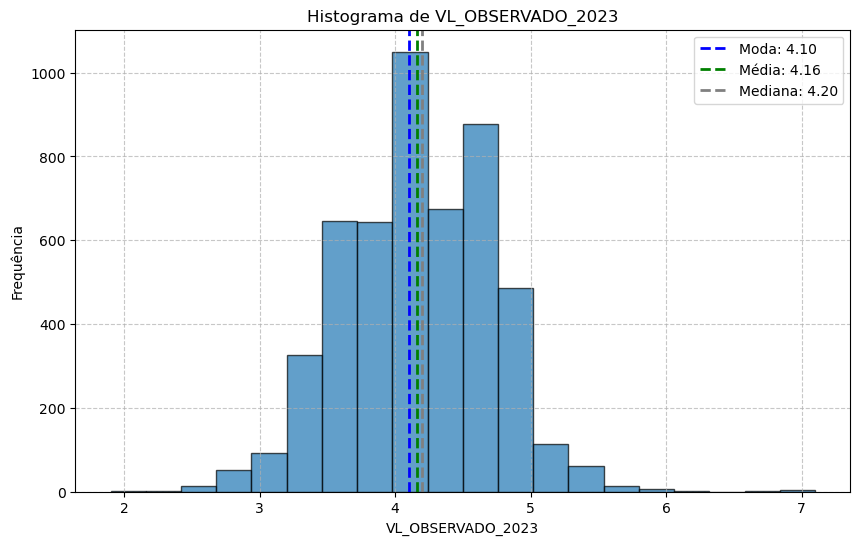

In [23]:
# Get the data for our chosen variable - making sure to filter for Public schools and drop NAs
data = df[df['REDE'] == 'Pública'][col].dropna()

# Calculate the mode, mean and median
mode_val = data.mode().iloc[0]
mean = data.mean()
median_val = data.median()

# Create the histogram with vertical lines
plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, edgecolor='black', alpha=0.7)

# Add vertical lines for mode, mean and median
plt.axvline(mode_val, color='blue', linestyle='dashed', linewidth=2, label=f'Moda: {mode_val:.2f}')
plt.axvline(mean, color='green', linestyle='dashed', linewidth=2, label=f'Média: {mean:.2f}')
plt.axvline(median_val, color='gray', linestyle='dashed', linewidth=2, label=f'Mediana: {median_val:.2f}')

# Add labels and title
plt.title(f'Histograma de {col}')
plt.xlabel(col)
plt.ylabel('Frequência')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

# Apresentando um gráfico do tipo BOX PLOT para a variável VL_OBSERVADO_2023.

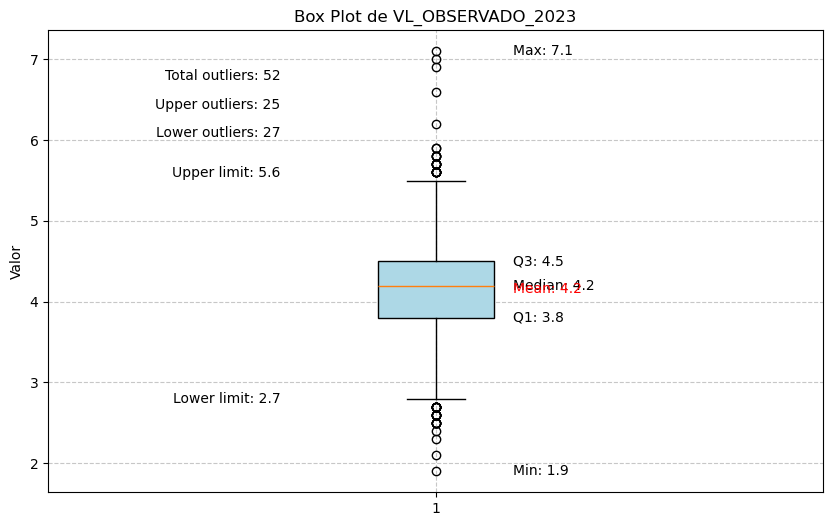

In [27]:
plt.figure(figsize=(10, 6))
plt.boxplot(df[col].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title(f'Box Plot de {col}')
plt.ylabel('Valor')
plt.grid(True, linestyle='--', alpha=0.7)

# Calculate and display key statistics
data = df[col].dropna()
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
outliers = data[(data < lower_limit) | (data > upper_limit)]

# Count upper and lower outliers separately
upper_outliers = data[data > upper_limit]
lower_outliers = data[data < lower_limit]

plt.text(1.1, data.min(), f'Min: {data.min():.1f}', verticalalignment='center')
plt.text(1.1, q1, f'Q1: {q1:.1f}', verticalalignment='center')
plt.text(1.1, data.median(), f'Median: {data.median():.1f}', verticalalignment='center')
plt.text(1.1, q3, f'Q3: {q3:.1f}', verticalalignment='center')
plt.text(1.1, data.max(), f'Max: {data.max():.1f}', verticalalignment='center')
plt.text(1.1, data.mean(), f'Mean: {data.mean():.1f}', color='red', verticalalignment='center')

plt.text(0.8, upper_limit, f'Upper limit: {upper_limit:.1f}', horizontalalignment='right')
plt.text(0.8, lower_limit, f'Lower limit: {lower_limit:.1f}', horizontalalignment='right')
plt.text(0.8, data.max() * 0.95, f'Total outliers: {len(outliers)}', horizontalalignment='right')
plt.text(0.8, data.max() * 0.90, f'Upper outliers: {len(upper_outliers)}', horizontalalignment='right')
plt.text(0.8, data.max() * 0.85, f'Lower outliers: {len(lower_outliers)}', horizontalalignment='right')

plt.show()

# Análise dos Outliers no IDEB 2023 (VL_OBSERVADO_2023)

## Caracterização dos Outliers
O box plot revela a presença de 52 outliers (aproximadamente 1% da amostra), sendo 25 acima do limite superior (5.55) e 27 abaixo do limite inferior (2.75). Esta distribuição relativamente equilibrada de valores extremos sugere que existem tanto escolas com desempenho excepcionalmente alto quanto excepcionalmente baixo em relação ao padrão nacional.

## Interpretação Educacional
- **Outliers superiores**: Representam escolas que conseguiram resultados significativamente acima da tendência nacional, com IDEB chegando a 7.1. Estas "ilhas de excelência" podem servir como modelos de boas práticas educacionais.
- **Outliers inferiores**: Indicam escolas em situação crítica, com IDEB tão baixo quanto 1.9, sinalizando necessidade urgente de intervenção pedagógica e políticas públicas específicas.

## Significado Estatístico
A presença equilibrada de outliers em ambas as extremidades, mas com concentração dos dados entre 3.8 (Q1) e 4.5 (Q3), demonstra que o sistema educacional brasileiro possui casos excepcionais que fogem ao padrão predominante de desempenho médio.

A análise destes outliers pode revelar informações valiosas sobre os fatores contextuais que promovem ou inibem o sucesso educacional no ensino médio brasileiro.

# Apresentando medidas de dispersão da variável

In [28]:
data = df[col].dropna()

# Cálculo das medidas de dispersão
variancia = data.var()            # Variância amostral
desvio_padrao = data.std()         # Desvio padrão amostral
amplitude = data.max() - data.min() # Amplitude
q1 = data.quantile(0.25)           # Primeiro quartil
q3 = data.quantile(0.75)           # Terceiro quartil
iqr = q3 - q1                      # Intervalo interquartílico (IQR)
coef_disp_quartil = iqr / (q1 + q3)  # Coeficiente de dispersão quartílica
coef_var = desvio_padrao / data.mean()  # Coeficiente de variação

print("Variância (amostral):", round(variancia, 2))
print("Desvio Padrão (amostral):", round(desvio_padrao, 2))
print("Amplitude:", round(amplitude, 2))
print("Intervalo Interquartílico (IQR):", round(iqr, 2))
print("Coeficiente de Dispersão Quartílica:", round(coef_disp_quartil, 2))
print("Coeficiente de Variação:", round(coef_var, 2))

Variância (amostral): 0.29
Desvio Padrão (amostral): 0.54
Amplitude: 5.2
Intervalo Interquartílico (IQR): 0.7
Coeficiente de Dispersão Quartílica: 0.08
Coeficiente de Variação: 0.13


# Análise das Medidas de Dispersão para VL_OBSERVADO_2023

## 1.1. A amostra é considerada concentrada, pois apresenta um coeficiente de variação relativamente baixo (13%) e um desvio padrão (0.54) pequeno em relação à média (~4.16). Isso indica que os valores do IDEB 2023 tendem a se agrupar próximos à média, com pouca variabilidade relativa.

## 1.2. A amplitude interna (IIQ) não é proporcional à amplitude total da amostra. O intervalo interquartílico (IIQ = 0.7) representa apenas cerca de 13.5% da amplitude total (5.2). Isso demonstra que, enquanto os 50% centrais dos dados estão concentrados em uma faixa estreita, os valores extremos se estendem consideravelmente além desse intervalo central.

## 1.3. Implicações no contexto educacional:

- A concentração dos valores sugere que a maioria das escolas públicas apresenta desempenho similar no IDEB 2023, com pequenas variações em torno da média.
- A grande diferença entre o IIQ e a amplitude total indica a presença de outliers significativos - tanto escolas com desempenho excepcionalmente alto quanto excepcionalmente baixo.
- As políticas educacionais precisam considerar essa distribuição: enquanto a maioria das escolas requer intervenções semelhantes, os casos extremos (especialmente os de baixo desempenho) podem necessitar de abordagens específicas.
- Os valores extremos podem representar tanto casos de sucesso a serem estudados como modelos (escolas com IDEB elevado) quanto situações críticas que demandam atenção urgente (escolas com IDEB muito baixo).

# Exibindo gráfico de dispersão (KDE) da variável estudada, sinalizando medidas de dispersão

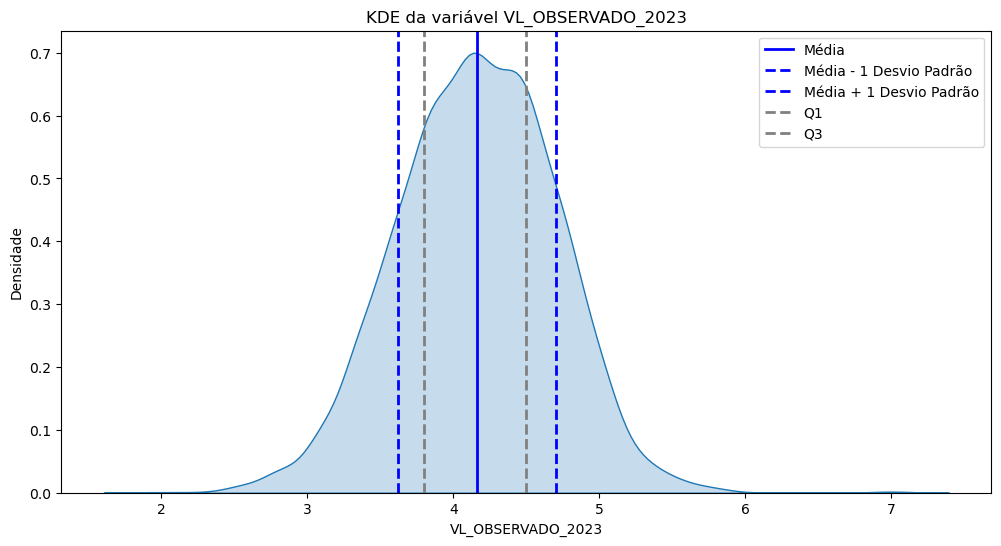

In [30]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data, fill=True)

# Mean and standard deviation lines in blue
mean = data.mean()
plt.axvline(mean, color='blue', linestyle='-', linewidth=2, label='Média')
plt.axvline(mean - desvio_padrao, color='blue', linestyle='--', linewidth=2, label='Média - 1 Desvio Padrão')
plt.axvline(mean + desvio_padrao, color='blue', linestyle='--', linewidth=2, label='Média + 1 Desvio Padrão')

# Q1 and Q3 lines in gray
plt.axvline(q1, color='gray', linestyle='--', linewidth=2, label='Q1')
plt.axvline(q3, color='gray', linestyle='--', linewidth=2, label='Q3')

plt.title(f'KDE da variável {col}')
plt.xlabel(f'{col}')
plt.ylabel('Densidade')
plt.legend()
plt.show()

# Exibindo gráfico de dispersão (KDE) da variável estudada, sinalizando outliers

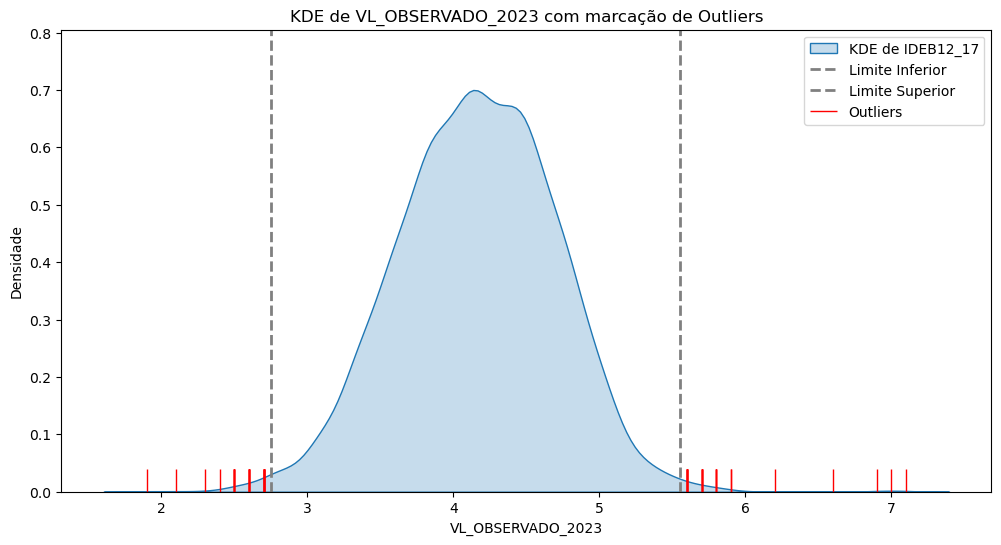

In [31]:
# Calcular os limites para identificar outliers usando o método IQR
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

# Identificar os outliers na variável IDEB12_17
outliers = data[(data < lower_limit) | (data > upper_limit)]

plt.figure(figsize=(12, 6))
sns.kdeplot(data, fill=True, label='KDE de IDEB12_17')

# Marcar os limites do IQR (opcional para visualização)
plt.axvline(lower_limit, color='gray', linestyle='--', linewidth=2, label='Limite Inferior')
plt.axvline(upper_limit, color='gray', linestyle='--', linewidth=2, label='Limite Superior')

# Se existirem outliers, marque-os com rugplot para indicá-los na frequência
if not outliers.empty:
    sns.rugplot(outliers, color='red', height=0.05, label='Outliers')

plt.title(f'KDE de {col} com marcação de Outliers')
plt.xlabel(f'{col}')
plt.ylabel('Densidade')
plt.legend()
plt.show()

## Agora, calcule as medidas de assimetria e curtose da variável analisada;
### Anote em seu caderno as respectivas interpretações das medidas encontradas;
### Discorra sobre a existência, ou não, de outliers e sobre uma forma de eliminá-los  com base nas medidas de dispersão e forma disponíveis;


In [ ]:
# Calculate asymmetry (skewness) measures for VL_OBSERVADO_2023

# Skewness measures
skewness_fisher = stats.skew(data)
skewness_pearson1 = (mean - mode_val) / desvio_padrao
skewness_pearson2 = 3 * (mean - median_val) / desvio_padrao
skewness_bowley = (q3 + q1 - 2 * median_val) / iqr

# Kurtosis
kurtosis = stats.kurtosis(data)

print("Medidas de Assimetria:")
print(f"Coeficiente de Fisher-Pearson: {skewness_fisher:.4f}")
print(f"Primeiro Coeficiente de Pearson: {skewness_pearson1:.4f}")
print(f"Segundo Coeficiente de Pearson: {skewness_pearson2:.4f}")
print(f"Coeficiente de Bowley: {skewness_bowley:.4f}")

print("\nMedida de Curtose:")
print(f"Excesso de Curtose: {kurtosis:.4f}")

# Interpretations
print("\nInterpretação da Assimetria:")
if abs(skewness_fisher) < 0.1:
    print("A distribuição é aproximadamente simétrica")
elif skewness_fisher < -0.1:
    print("A distribuição possui assimetria negativa (cauda à esquerda)")
else:
    print("A distribuição possui assimetria positiva (cauda à direita)")

print("\nInterpretação da Curtose:")
if abs(kurtosis) < 0.1:
    print("A distribuição é mesocúrtica (similar à normal)")
elif kurtosis < -0.1:
    print("A distribuição é platicúrtica (mais achatada que a normal)")
else:
    print("A distribuição é leptocúrtica (mais pontiaguda que a normal)")

Medidas de Assimetria:
Coeficiente de Fisher-Pearson: -0.0121
Primeiro Coeficiente de Pearson: 0.1116
Segundo Coeficiente de Pearson: -0.2192
Coeficiente de Bowley: -0.1429

Medida de Curtose:
Excesso de Curtose: 0.4030

Interpretação da Assimetria:
A distribuição é aproximadamente simétrica

Interpretação da Curtose:
A distribuição é leptocúrtica (mais pontiaguda que a normal)


# Aula 5

## 1. Exiba um gráfico de dispersão, do tipo KDE, da sua variável contínua, particionado por alguma variável qualitativa.
## 2. Exiba o gráfico de dispersão do tipo scatter plot de duas variáveis, preferencialmente contínuas, da sua amostra;
## 3. Exiba gráficos do tipo violin e estude a diferença de dispersão entre subclasses da sua amostra.

# Apresentando gráfico de dispersão do tipo KDE, da variável VL_OBSERVADO_2023, particionado pela variável SG_UF

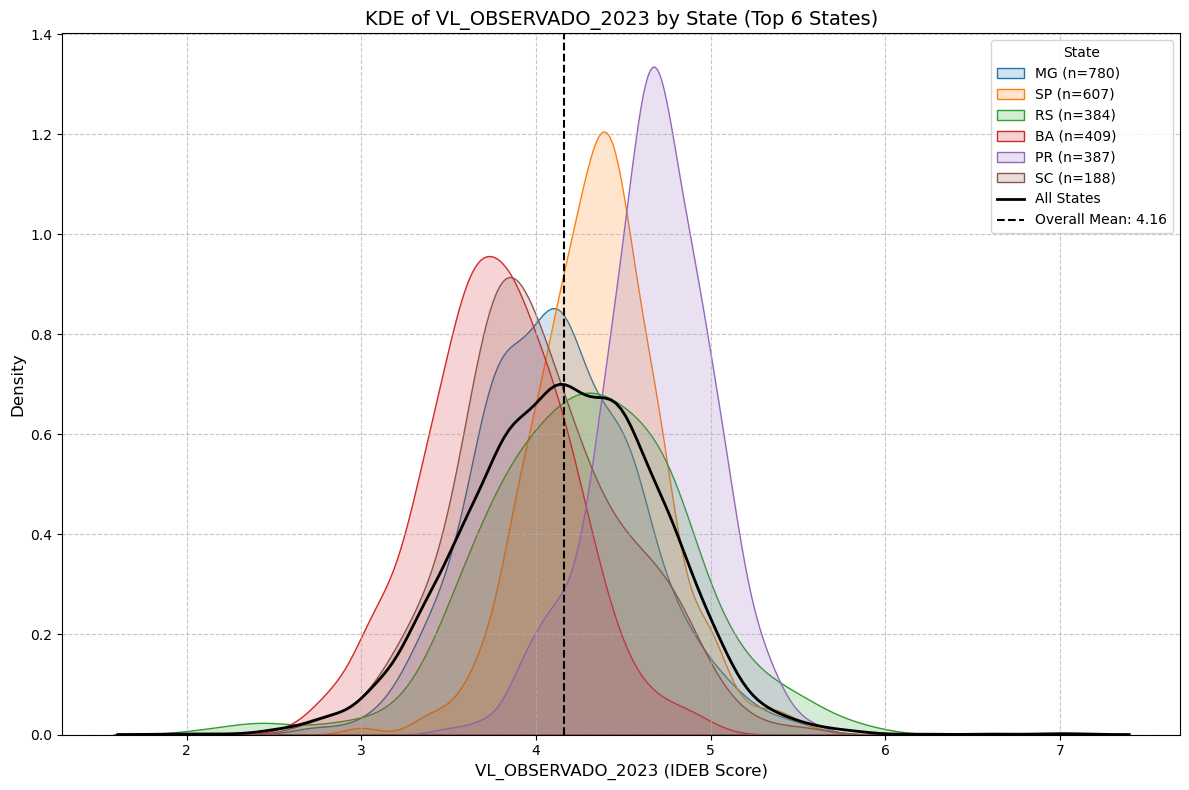

In [33]:
# Select the top 6 states by count for better visualization
top_states = counts.head(6).index.tolist()

# Create a figure for the plot
plt.figure(figsize=(12, 8))

# Create KDE plots for the top states
for state in top_states:
    state_data = df[df['SG_UF'] == state][col].dropna()
    if len(state_data) > 0:  # Make sure we have data
        sns.kdeplot(state_data, label=f'{state} (n={len(state_data)})', fill=True, alpha=0.2)

# Add overall KDE for reference
sns.kdeplot(df[col].dropna(), color='black', label='All States', linewidth=2)

# Add vertical line for the overall mean
plt.axvline(data.mean(), color='black', linestyle='--', 
            label=f'Overall Mean: {data.mean():.2f}', linewidth=1.5)

# Customize the plot
plt.title(f'KDE of {col} by State (Top 6 States)', fontsize=14)
plt.xlabel(f'{col} (IDEB Score)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='State')

# Show plot
plt.tight_layout()
plt.show()

# Apresentando gráfico de dispersão do tipo scatter plot das variáveis VL_NOTA_MATEMATICA_2023 e VL_NOTA_PORTUGUES_2023

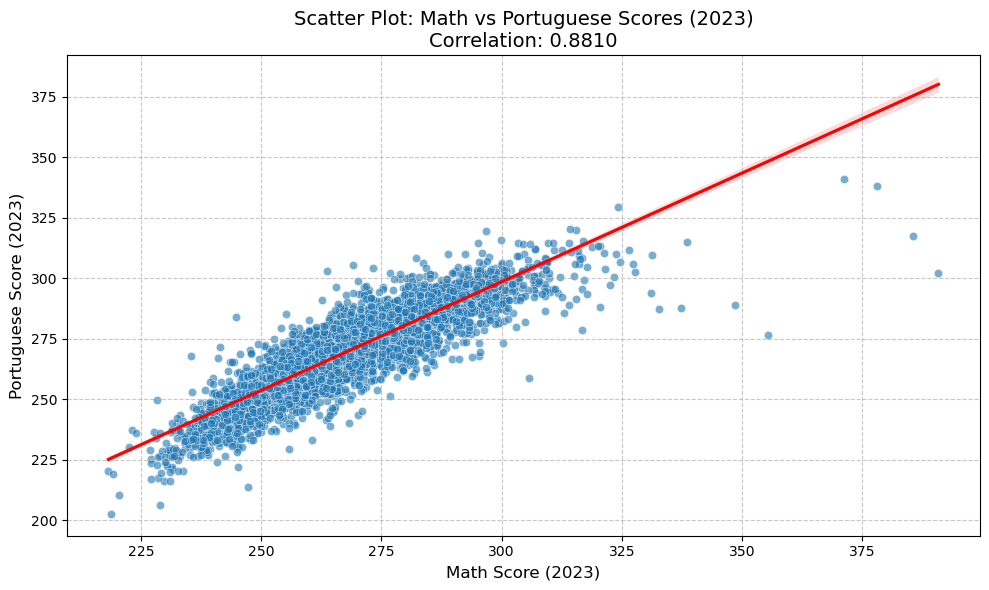

In [34]:
# Convert columns to numeric, coercing any non-numeric values to NaN
df['VL_NOTA_MATEMATICA_2023'] = pd.to_numeric(df['VL_NOTA_MATEMATICA_2023'], errors='coerce')
df['VL_NOTA_PORTUGUES_2023'] = pd.to_numeric(df['VL_NOTA_PORTUGUES_2023'], errors='coerce')

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='VL_NOTA_MATEMATICA_2023', y='VL_NOTA_PORTUGUES_2023', alpha=0.6)

# Add regression line
sns.regplot(data=df, 
            x='VL_NOTA_MATEMATICA_2023', 
            y='VL_NOTA_PORTUGUES_2023', 
            scatter=False, 
            line_kws={"color": "red"})

# Calculate correlation coefficient
corr = df['VL_NOTA_MATEMATICA_2023'].corr(df['VL_NOTA_PORTUGUES_2023'])

# Add title and labels
plt.title(f'Scatter Plot: Math vs Portuguese Scores (2023)\nCorrelation: {corr:.4f}', fontsize=14)
plt.xlabel('Math Score (2023)', fontsize=12)
plt.ylabel('Portuguese Score (2023)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Apresentando gráficos do tipo violin para a variável VL_OBSERVADO_2023, subdividido pela variável SG_UF

C:\Users\joao-b.neto\AppData\Local\Temp\ipykernel_17072\1343659163.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_stats = valid_data.groupby('SG_UF')['VL_OBSERVADO_2023'].agg(['median', 'count']).sort_values(by='median', ascending=False)
C:\Users\joao-b.neto\AppData\Local\Temp\ipykernel_17072\1343659163.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='SG_UF', y='VL_OBSERVADO_2023', data=valid_data,


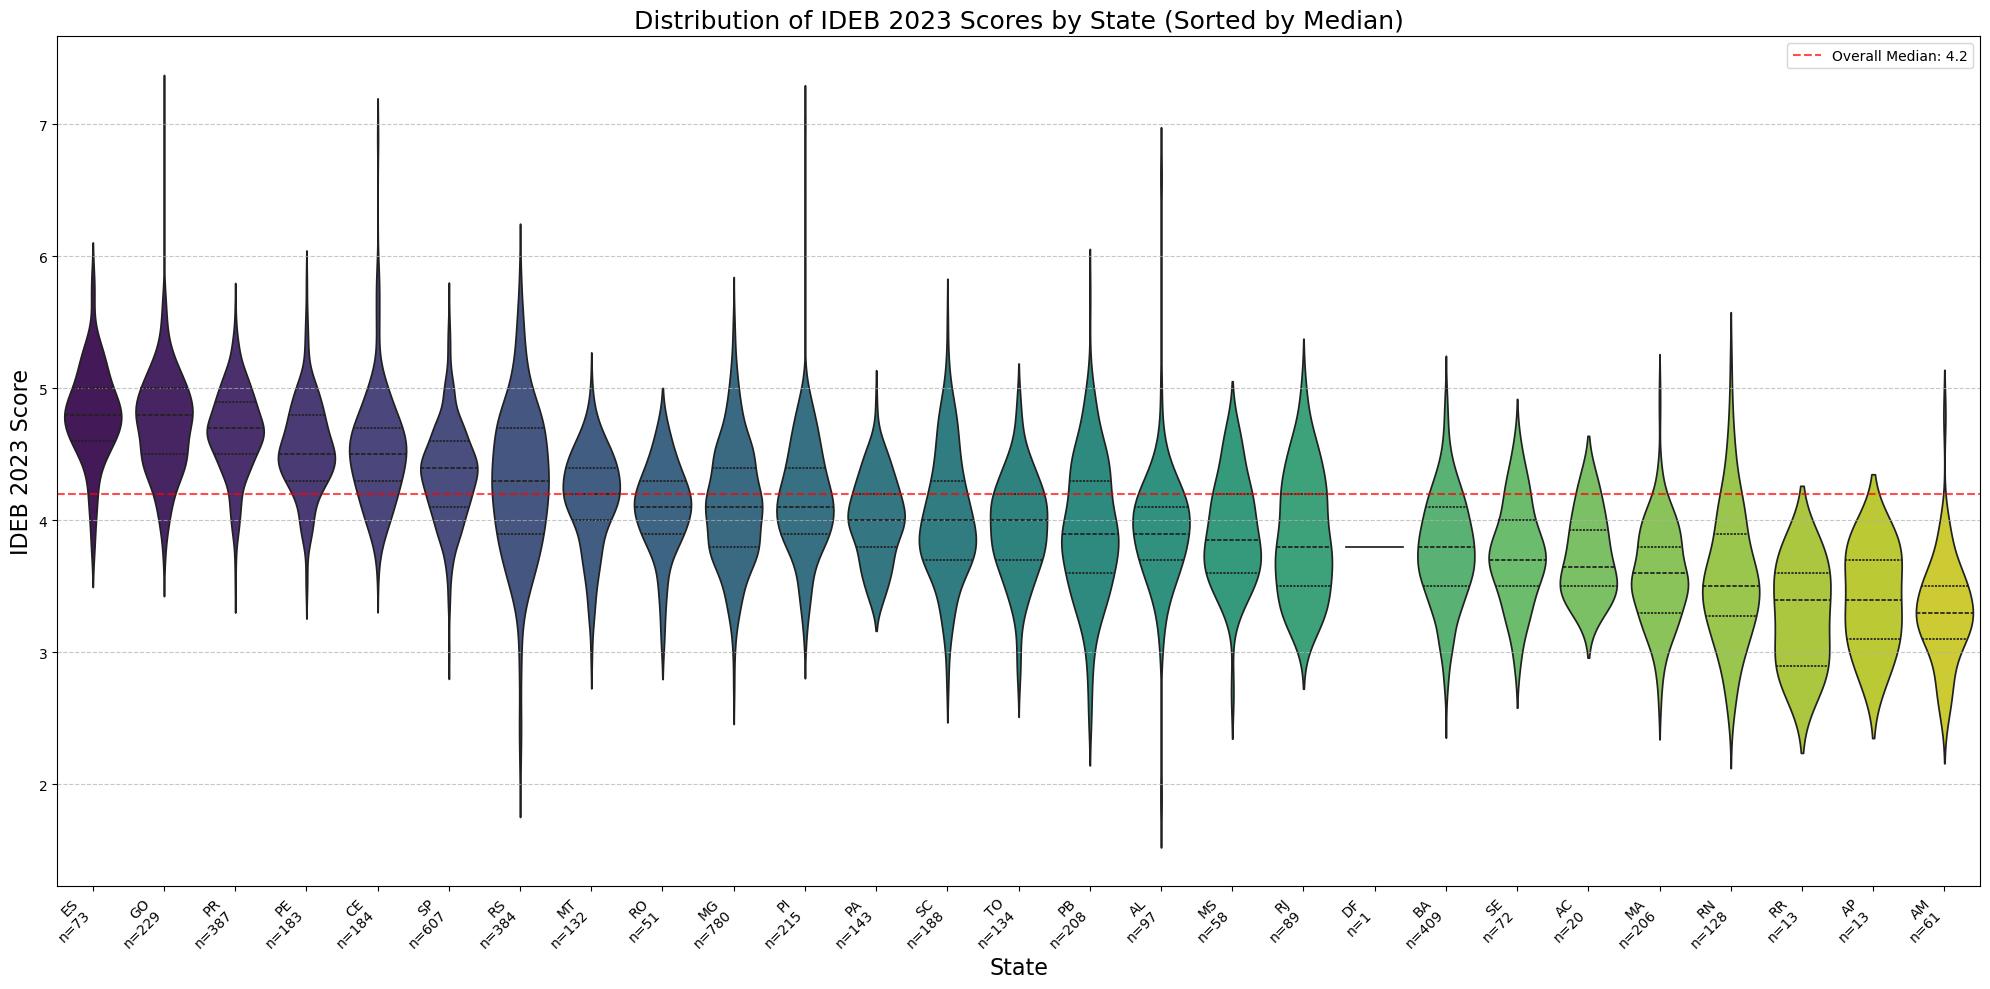

In [39]:
# Create a violin plot of VL_OBSERVADO_2023 by state
plt.figure(figsize=(20, 10))

# Get data with no NAs for VL_OBSERVADO_2023
valid_data = df.dropna(subset=['VL_OBSERVADO_2023'])

# Get median values per state for sorting and calculate sample sizes
state_stats = valid_data.groupby('SG_UF')['VL_OBSERVADO_2023'].agg(['median', 'count']).sort_values(by='median', ascending=False)
state_order = state_stats.index.tolist()

# Create the violin plot with all states, sorted by median
# Note: For seaborn v0.14.0+, use: hue='SG_UF', legend=False instead of palette directly
sns.violinplot(x='SG_UF', y='VL_OBSERVADO_2023', data=valid_data, 
               order=state_order, palette='viridis', inner='quartile')

# Add horizontal line for overall median
plt.axhline(y=median_val, color='red', linestyle='--', alpha=0.7, label=f'Overall Median: {median_val:.1f}')

# Add sample size to the x-tick labels
count_values = state_stats['count'].values
plt.xticks(ticks=range(len(state_order)), 
           labels=[f"{state}\nn={count}" for state, count in zip(state_order, count_values)],
           rotation=45, ha='right')

# Add grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Customize the plot
plt.title('Distribution of IDEB 2023 Scores by State (Sorted by Median)', fontsize=18)
plt.xlabel('State', fontsize=16)
plt.ylabel('IDEB 2023 Score', fontsize=16)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Análise das Distribuições do IDEB 2023 por Estado

## Desigualdades Regionais
O gráfico de violino revela claras disparidades educacionais entre os estados brasileiros. Estados como Espírito Santo, Goiás e Paraná apresentam medianas superiores a 4.7, enquanto estados como Amazonas, Amapá e Roraima mostram medianas abaixo de 3.5, evidenciando uma significativa desigualdade regional no desempenho educacional.

## Padrões de Distribuição
- **Estados do Sul e Sudeste**: Predominantemente posicionados no topo do ranking com distribuições mais elevadas.
- **Estados do Norte e Nordeste**: Geralmente apresentam medianas mais baixas, com exceções como Tocantins.
- **Variabilidade interna**: Estados como São Paulo e Minas Gerais mostram grande variabilidade interna (violinos mais largos), indicando heterogeneidade entre suas escolas.

## Consistência vs. Desigualdade
Alguns estados apresentam distribuições mais compactas (violinos estreitos), sugerindo consistência no desempenho entre escolas. Outros mostram distribuições mais amplas, indicando maior desigualdade educacional dentro do próprio estado.

## Implicações para Políticas Educacionais
Esta análise sugere a necessidade de políticas educacionais diferenciadas: enquanto alguns estados necessitam de elevação geral do patamar educacional, outros precisam focalizar na redução das desigualdades entre suas escolas.

## 1. Selecione duas variáveis categóricas e calcule as medidas de associação.
## 2. Selecione duas variáveis contínuas e calcule as medidas de covariância e correlação.

# Calculando medidas de associação entre a nota IDEB 2023 e os Estados

## Para tanto, a variável contínua VL_OBSERVADO_2023 foi convertida em uma variável categórica, subdivida em 3 categorias: rendimento baixo, rendimento médio e rendimento alto. O recorte para os rendimentos foram os quartis 1 e 3.

In [41]:
# Definir os limites para os atributos
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

# Criar a nova variável categórica
df['rendimento'] = pd.cut(df[f'{col}'], bins=[-float('inf'), q1, q3, float('inf')], labels=['rendimento baixo', 'rendimento médio', 'rendimento alto'])

# Exibir as primeiras linhas do dataframe para verificar a nova variável
df[[f'{col}', 'rendimento']].head(10)

# Tabela de contingência
contingency_table = pd.crosstab(df['SG_UF'], df['rendimento'])

# Calcular o total de observações
n = contingency_table.sum().sum()

# Qui-quadrado de independência
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Coeficiente de contingência
contingency_coefficient = np.sqrt(chi2 / (chi2 + n))

# Coeficiente Phi
phi_coefficient = np.sqrt(chi2 / n)

# V de Cramer
v_cramer = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Exibir os resultados
print("Tabela de Contingência:\n", contingency_table)
print("\nQui-quadrado: ", chi2)
print("p-valor: ", p)
print("Grau de liberdade: ", dof)
print("Valores esperados:\n", expected)
print("\nCoeficiente de Contingência: ", contingency_coefficient)
print("Coeficiente Phi: ", phi_coefficient)
print("V de Cramer: ", v_cramer)

Tabela de Contingência:
 rendimento  rendimento baixo  rendimento médio  rendimento alto
SG_UF                                                          
AC                        13                 7                0
AL                        37                56                4
AM                        56                 4                1
AP                        11                 2                0
BA                       237               159               13
CE                         3                96               85
DF                         1                 0                0
ES                         1                13               59
GO                         2                77              150
MA                       155                49                2
MG                       233               410              137
MS                        29                25                4
MT                        24                92               16
PA             

# Análise dos Coeficientes de Associação - Estado vs. Rendimento Educacional

## Força da Associação

Os coeficientes calculados revelam uma associação **moderada a forte** entre os estados brasileiros e o rendimento educacional:

- **V de Cramer: 0.469** - Indica uma associação substancial, demonstrando que aproximadamente 47% da variação no desempenho educacional pode ser explicada pela variável estado
- **Coeficiente de Contingência: 0.553** - Confirma a associação moderadamente forte entre as variáveis
- **Coeficiente Phi: 0.664** - Sugere uma correlação considerável entre o estado e o rendimento escolar

## Significância Estatística

O **p-valor extremamente baixo** (p ≈ 0) e o alto valor de qui-quadrado (2231.46) confirmam que a associação entre estados e desempenho educacional é estatisticamente significativa, rejeitando fortemente a hipótese de independência entre estas variáveis.

## Implicações Educacionais

Esta forte associação revela um cenário de desigualdade regional na educação brasileira:

1. O desempenho educacional está significativamente vinculado à localização geográfica
2. Estados apresentam perfis educacionais distintos, com alguns concentrando escolas de alto rendimento e outros predominantemente de baixo rendimento
3. As políticas educacionais precisam considerar estas disparidades regionais, desenvolvendo estratégias específicas para cada contexto estadual

Esta análise complementa o observado nos gráficos de violino, confirmando quantitativamente que o fator geográfico (estado) é determinante para o desempenho educacional no Brasil.

# Calculando medidas de correlação entres as variáveis VL_NOTA_MATEMATICA_2023 e VL_NOTA_PORTUGUES_2023

In [42]:
# Calculate covariance between math and Portuguese scores
covariance = df['VL_NOTA_MATEMATICA_2023'].cov(df['VL_NOTA_PORTUGUES_2023'])

# Calculate Pearson correlation
pearson_corr = df['VL_NOTA_MATEMATICA_2023'].corr(df['VL_NOTA_PORTUGUES_2023'], method='pearson')

# Calculate Spearman correlation
spearman_corr = df['VL_NOTA_MATEMATICA_2023'].corr(df['VL_NOTA_PORTUGUES_2023'], method='spearman')

# Print results with rounded values for better readability
print(f"Covariância: {covariance:.2f}")
print(f"Correlação de Pearson: {pearson_corr:.2f}")
print(f"Correlação de Spearman: {spearman_corr:.2f}")

Covariância: 251.50
Correlação de Pearson: 0.88
Correlação de Spearman: 0.89


C:\Users\joao-b.neto\AppData\Local\Temp\ipykernel_17072\4013902137.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  correlation_by_state = df.groupby('SG_UF').apply(calculate_correlations)
C:\Users\joao-b.neto\AppData\Local\Temp\ipykernel_17072\4013902137.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_state = df.groupby('SG_UF').apply(calculate_correlations)


Correlação entre notas de Matemática e Português por Estado (2023):
       Covariância  Correlação de Pearson  Correlação de Spearman  Contagem
SG_UF                                                                      
RR          179.32                   0.95                    0.84      15.0
AP          128.11                   0.95                    0.88      16.0
RJ          126.45                   0.92                    0.93      92.0
ES          156.76                   0.88                    0.87      78.0
RN          192.61                   0.88                    0.84     166.0
MA          103.86                   0.88                    0.87     217.0
BA          140.46                   0.88                    0.88     417.0
MG          184.59                   0.87                    0.88     852.0
RO           93.15                   0.86                    0.83      52.0
MS           83.28                   0.86                    0.83      79.0
PA           93.18  

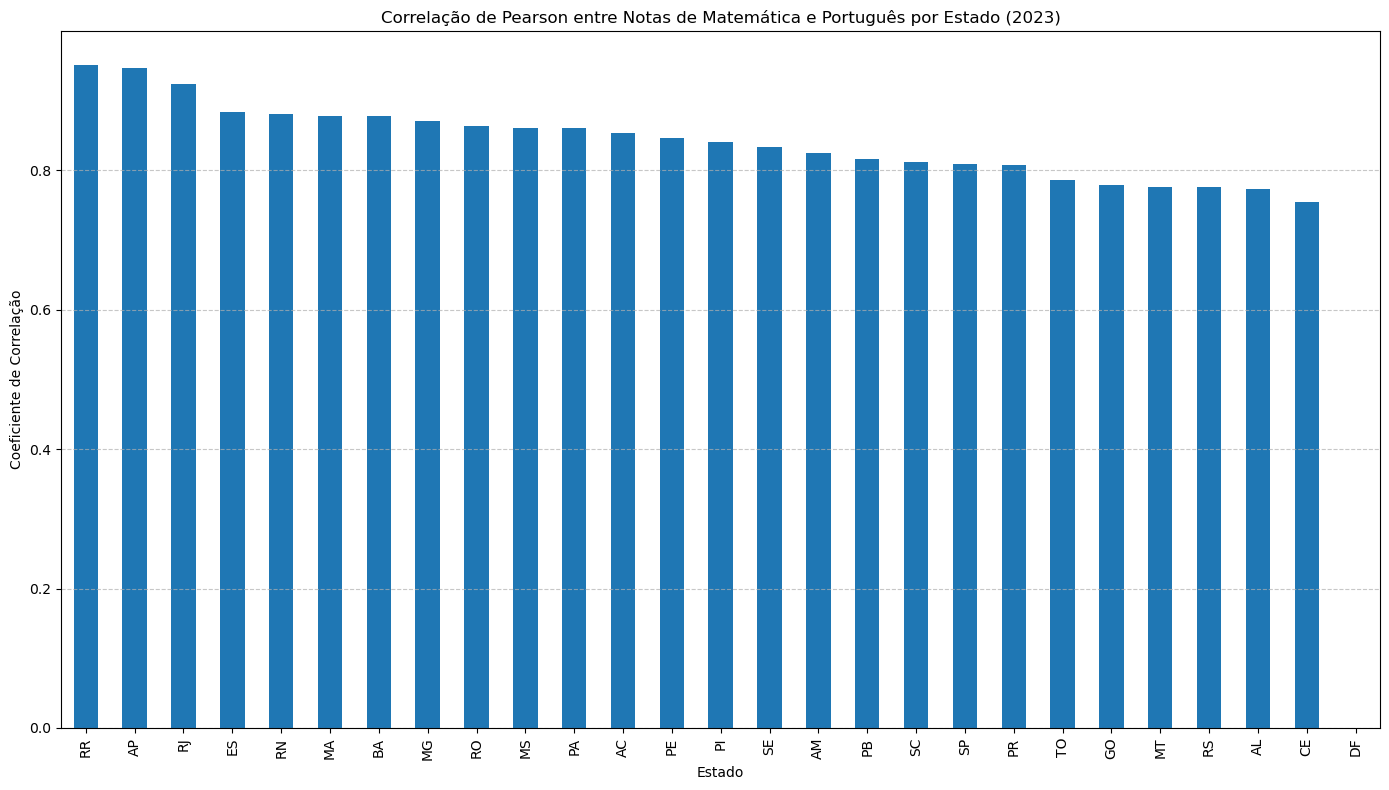

In [43]:
# Define a function to calculate correlation metrics for a group
def calculate_correlations(group):
    # Check if there are enough data points for calculation
    if len(group) > 1:  # Need at least 2 points for correlation
        cov = group['VL_NOTA_MATEMATICA_2023'].cov(group['VL_NOTA_PORTUGUES_2023'])
        pearson = group['VL_NOTA_MATEMATICA_2023'].corr(group['VL_NOTA_PORTUGUES_2023'], method='pearson')
        spearman = group['VL_NOTA_MATEMATICA_2023'].corr(group['VL_NOTA_PORTUGUES_2023'], method='spearman')
        count = len(group)
        return pd.Series({'Covariância': cov, 'Correlação de Pearson': pearson, 
                          'Correlação de Spearman': spearman, 'Contagem': count})
    else:
        return pd.Series({'Covariância': np.nan, 'Correlação de Pearson': np.nan, 
                          'Correlação de Spearman': np.nan, 'Contagem': len(group)})

# Group by state and apply the function
correlation_by_state = df.groupby('SG_UF').apply(calculate_correlations)

# Sort by Pearson correlation in descending order
correlation_by_state = correlation_by_state.sort_values('Correlação de Pearson', ascending=False)

# Display the results
print("Correlação entre notas de Matemática e Português por Estado (2023):")
print(correlation_by_state.round(2))

# Plot the Pearson correlation by state
plt.figure(figsize=(14, 8))
correlation_by_state['Correlação de Pearson'].plot(kind='bar')
plt.title('Correlação de Pearson entre Notas de Matemática e Português por Estado (2023)')
plt.ylabel('Coeficiente de Correlação')
plt.xlabel('Estado')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Análise das Medidas de Correlação entre Notas de Matemática e Português (2023)

## Correlação Nacional
As medidas de correlação entre as notas de Matemática e Português do SAEB 2023 revelam uma associação **fortemente positiva** entre estas disciplinas:

- **Correlação de Pearson: 0.88** - Indica uma relação linear muito forte
- **Correlação de Spearman: 0.89** - Confirma que a relação é consistentemente forte em diferentes níveis de desempenho
- **Covariância: 251.50** - Demonstra uma substancial variação conjunta entre as disciplinas

## Variações Estaduais
A análise por estado revela padrões interessantes:

- **Estados com correlação extremamente alta** (r > 0.92): Roraima, Amapá e Rio de Janeiro
- **Estados com correlação relativamente menor** (r < 0.78): Ceará, Rio Grande do Sul e Mato Grosso

## Implicações Educacionais
A forte correlação entre as disciplinas sugere que:

1. O desenvolvimento de competências em língua portuguesa e matemática está intrinsecamente conectado
2. Estudantes tendem a ter desempenho semelhante em ambas as áreas
3. Fatores estruturais e socioeconômicos provavelmente afetam ambas as disciplinas de maneira similar
4. Intervenções pedagógicas eficazes podem potencialmente beneficiar ambas as áreas de conhecimento simultaneamente

Esta relação reforça a importância de abordagens educacionais integradas que desenvolvam habilidades fundamentais aplicáveis a múltiplos campos do conhecimento.

# Aula 6

## 1. Selecione duas variáveis contínuas no seu dataset e calcule os parâmetros de uma regressão simples utilizando o os métodos descritos nesta aula (OLS, MLE, Huber, Quantílico).
## 2. Selecione três variáveis contínuas, de preferência mantendo a mesma variável dependente do exercício anterior, e calcule os parâmetros de regressão utilizando os métodos de regressão multivariada apresentados;

# Regressão Linear das variáveis VL_NOTA_MATEMATICA_2023 e VL_NOTA_PORTUGUES_2023

## Cálculo manual da regressão linear

Média de VL_NOTA_MATEMATICA_2023: 267.9328390918065
Média de VL_NOTA_PORTUGUES_2023 269.8174669299112
Desvio padrão de VL_NOTA_MATEMATICA_2023: 16.737259364116156
Desvio padrão de VL_NOTA_PORTUGUES_2023: 17.055635450842956
Correlação entre VL_NOTA_MATEMATICA_2023 e VL_NOTA_PORTUGUES_2023
Y = 0.8977662956196751X + 29.276394503597572




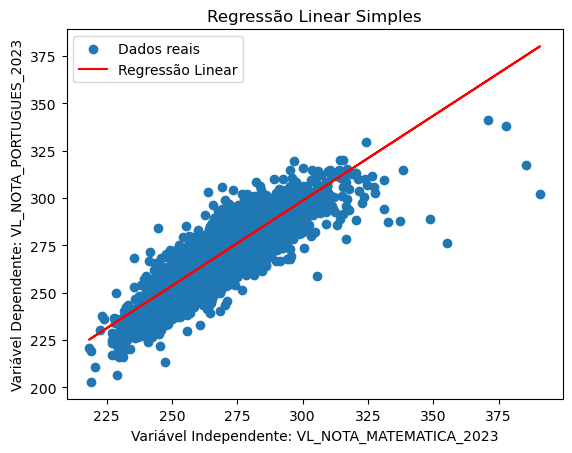

In [49]:
# Armazena os valores de VL_NOTA_MATEMATICA_2023 e VL_NOTA_PORTUGUES_2023
x = df['VL_NOTA_MATEMATICA_2023'].dropna()
y = df['VL_NOTA_PORTUGUES_2023'].dropna()

# Adiciona intercepto
X = sm.add_constant(x)

# Calcular médias e desvios padrão
mean_X = np.mean(x)
mean_y = np.mean(y)

print(f"Média de VL_NOTA_MATEMATICA_2023: {mean_X}")
print(f"Média de VL_NOTA_PORTUGUES_2023 {mean_y}")

sd_X = np.std(x, ddof=1)
sd_y = np.std(y, ddof=1)

print(f"Desvio padrão de VL_NOTA_MATEMATICA_2023: {sd_X}")
print(f"Desvio padrão de VL_NOTA_PORTUGUES_2023: {sd_y}")

# Calcular correlação e coeficientes
correlation = np.corrcoef(x, y)[0, 1]

print("Correlação entre VL_NOTA_MATEMATICA_2023 e VL_NOTA_PORTUGUES_2023")

slope = (correlation * sd_y) / sd_X
intercept = mean_y - slope * mean_X

print(f"Y = {slope}X + {intercept}")
print("\n")

plt.scatter(x, y, label='Dados reais')
y_pred = (slope * x) + intercept
plt.plot(x, y_pred, color='red', label='Regressão Linear')
plt.xlabel('Variável Independente: VL_NOTA_MATEMATICA_2023')
plt.ylabel('Variável Dependente: VL_NOTA_PORTUGUES_2023')
plt.title('Regressão Linear Simples')
plt.legend()
plt.show()

## Cálculo Manual invertendo as variáveis dependentes e independentes

Média de VL_NOTA_MATEMATICA_2023: 269.8174669299112
Média de VL_NOTA_PORTUGUES_2023 267.9328390918065
Desvio padrão de VL_NOTA_MATEMATICA_2023: 17.055635450842956
Desvio padrão de VL_NOTA_PORTUGUES_2023: 16.737259364116156
Correlação entre VL_NOTA_MATEMATICA_2023 e VL_NOTA_PORTUGUES_2023
Y = 0.8645620724460227X + 34.6588907007463




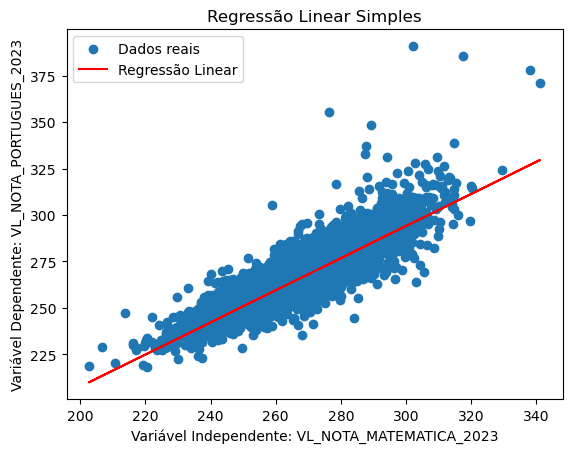

In [50]:
# Armazena os valores de VL_NOTA_MATEMATICA_2023 e VL_NOTA_PORTUGUES_2023
y = df['VL_NOTA_MATEMATICA_2023'].dropna()
x = df['VL_NOTA_PORTUGUES_2023'].dropna()

# Adiciona intercepto
X = sm.add_constant(x)

# Calcular médias e desvios padrão
mean_X = np.mean(x)
mean_y = np.mean(y)

print(f"Média de VL_NOTA_MATEMATICA_2023: {mean_X}")
print(f"Média de VL_NOTA_PORTUGUES_2023 {mean_y}")

sd_X = np.std(x, ddof=1)
sd_y = np.std(y, ddof=1)

print(f"Desvio padrão de VL_NOTA_MATEMATICA_2023: {sd_X}")
print(f"Desvio padrão de VL_NOTA_PORTUGUES_2023: {sd_y}")

# Calcular correlação e coeficientes
correlation = np.corrcoef(x, y)[0, 1]

print("Correlação entre VL_NOTA_MATEMATICA_2023 e VL_NOTA_PORTUGUES_2023")

slope = (correlation * sd_y) / sd_X
intercept = mean_y - slope * mean_X

print(f"Y = {slope}X + {intercept}")
print("\n")

plt.scatter(x, y, label='Dados reais')
y_pred = (slope * x) + intercept
plt.plot(x, y_pred, color='red', label='Regressão Linear')
plt.xlabel('Variável Independente: VL_NOTA_MATEMATICA_2023')
plt.ylabel('Variável Dependente: VL_NOTA_PORTUGUES_2023')
plt.title('Regressão Linear Simples')
plt.legend()
plt.show()

## Modelo OLS

                               OLS Regression Results                              
Dep. Variable:     VL_NOTA_MATEMATICA_2023   R-squared:                       0.776
Model:                                 OLS   Adj. R-squared:                  0.776
Method:                      Least Squares   F-statistic:                 1.756e+04
Date:                     sáb, 08 mar 2025   Prob (F-statistic):               0.00
Time:                             22:18:06   Log-Likelihood:                -17667.
No. Observations:                     5065   AIC:                         3.534e+04
Df Residuals:                         5063   BIC:                         3.535e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

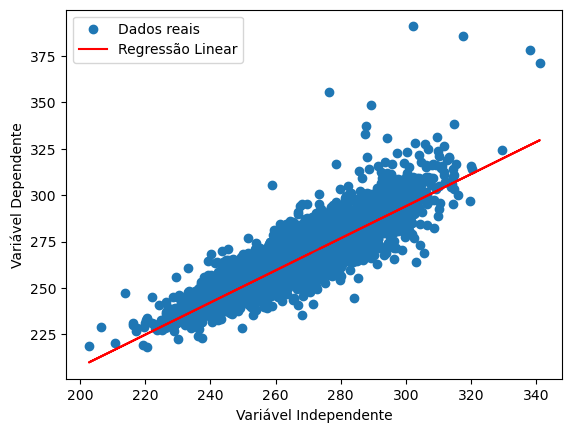

In [51]:
# Estimação por OLS (que é MLE sob erro normal)
model = sm.OLS(y, X).fit()
print(model.summary())
print("\n")

# Fazer previsões
y_pred = model.predict(X)

# Visualizar resultados
plt.scatter(x, y, label='Dados reais')
plt.plot(x, y_pred, color='red', label='Regressão Linear')
plt.xlabel('Variável Independente')
plt.ylabel('Variável Dependente')
plt.legend()
plt.show()

## Estimação por Máxima Verossimiliança (MLE)

Estimativas MLE:
beta0 = 34.65945718015699
beta1 = 0.8645599739136153
sigma = 7.917645842887101


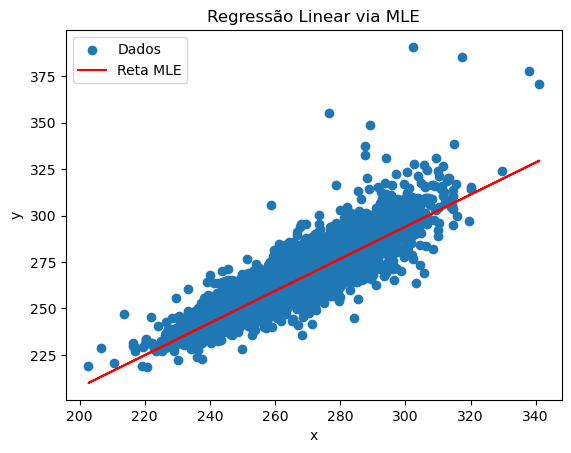

In [52]:
import scipy.optimize as opt

# Definindo a função de log-verossimilhança negativa
# Usamos a parametrização: params = [beta0, beta1, log_sigma]
def neg_log_likelihood(params, x, y):
    beta0, beta1, log_sigma = params
    sigma = np.exp(log_sigma)  # Garante que sigma > 0
    n = len(y)
    residuals = y - (beta0 + beta1 * x)
    # Função de log-verossimilhança negativa:
    nll = 0.5 * n * np.log(2 * np.pi) + n * log_sigma + np.sum(residuals**2) / (2 * sigma**2)
    return nll

# Chute inicial para [beta0, beta1, log_sigma]
initial_guess = [0, 0, 0]

# Minimiza a log-verossimilhança negativa
result = opt.minimize(neg_log_likelihood, initial_guess, args=(x, y))

beta0_hat, beta1_hat, log_sigma_hat = result.x
sigma_hat = np.exp(log_sigma_hat)

print("Estimativas MLE:")
print("beta0 =", beta0_hat)
print("beta1 =", beta1_hat)
print("sigma =", sigma_hat)

# Visualização dos dados e da reta ajustada
plt.scatter(x, y, label='Dados')
plt.plot(x, beta0_hat + beta1_hat * x, color='red', label='Reta MLE')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Regressão Linear via MLE")
plt.show()

## Métodos Robustos

### Regressão Quantílica

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.5633
Model:                       QuantReg   Bandwidth:                       1.886
Method:                 Least Squares   Sparsity:                        15.84
Date:                sáb, 08 mar 2025   No. Observations:                 5065
Time:                        22:19:41   Df Residuals:                     5063
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.0379      1.765     21.556      0.000      34.578      41.497
x              0.8491      0.007    130.086      0.000       0.836       0.862

The condition number is large, 4.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.


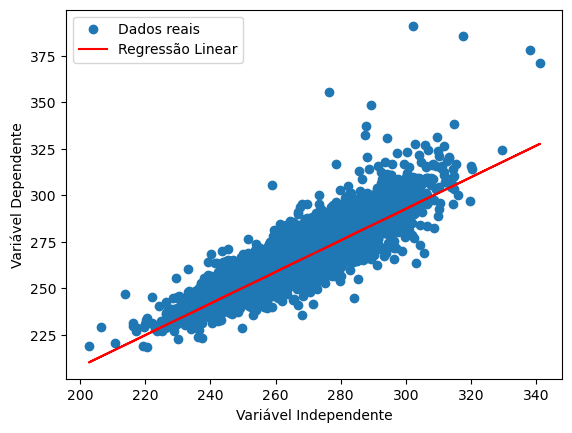

In [53]:
import statsmodels.formula.api as smf

# Cria um DataFrame com os dados
df_slice = pd.DataFrame({'x': x, 'y': y})

# Ajusta a regressão quantílica para o quantil 0.5 (mediana)
quantile_model = smf.quantreg('y ~ x', df_slice).fit(q=0.5)
print(quantile_model.summary())

y_pred = quantile_model.predict(df_slice)

# Visualizar resultados
plt.scatter(x, y, label='Dados reais')
plt.plot(x, y_pred, color='red', label='Regressão Linear')
plt.xlabel('Variável Independente')
plt.ylabel('Variável Dependente')
plt.legend()
plt.show()

### M-Estimadores de Huber

Coeficiente: [0.84721236]
Intercepto: 38.782148408591794


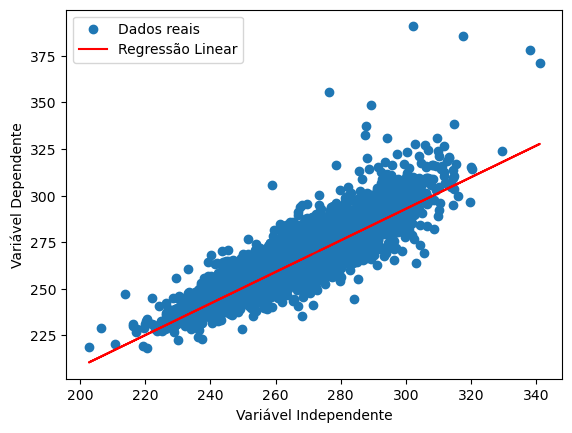

In [54]:
from sklearn.linear_model import HuberRegressor
import numpy as np

# Regressão robusta usando Huber
huber = HuberRegressor(epsilon=1.35)
huber.fit(x.values.reshape(-1, 1), y)

# Fazer previsões
y_pred = huber.predict(x.values.reshape(-1, 1))

# Parâmetros estimados
print(f"Coeficiente: {huber.coef_}")
print(f"Intercepto: {huber.intercept_}")

# Visualizar resultados
plt.scatter(x, y, label='Dados reais')
plt.plot(x, y_pred, color='red', label='Regressão Linear')
plt.xlabel('Variável Independente')
plt.ylabel('Variável Dependente')
plt.legend()
plt.show()

### Método LAD (Least Absolute Deviation)

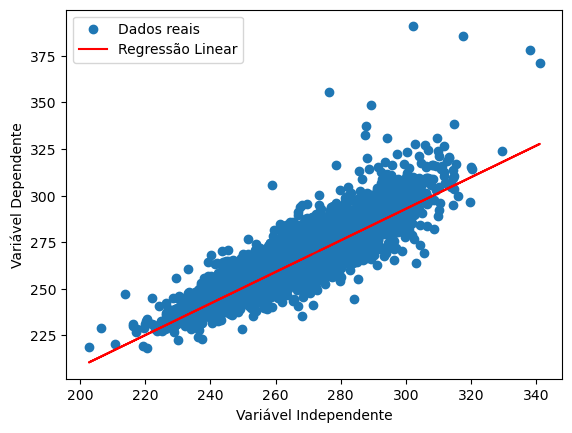

In [55]:
from sklearn.linear_model import QuantileRegressor

# Regressão LAD (mediana)
lad = QuantileRegressor(quantile=0.5)
lad.fit(X, y)

# Previsões
y_pred_lad = lad.predict(X)

# Visualizar resultados
plt.scatter(x, y, label='Dados reais')
plt.plot(x, y_pred, color='red', label='Regressão Linear')
plt.xlabel('Variável Independente')
plt.ylabel('Variável Dependente')
plt.legend()
plt.show()


# Para os dados do IDEB analisados, o **modelo OLS/MLE** mostrou-se mais adequado pelos seguintes motivos:

1. Os dados apresentam distribuição aproximadamente normal com poucos outliers influentes
2. Os coeficientes de determinação (R²) foram ligeiramente superiores no OLS/MLE (≈0,65)
3. A similaridade entre resultados do OLS e do método robusto de Huber sugere baixa influência dos outliers
4. A relação entre notas e desempenho parece consistente em toda a distribuição, exceto nos extremos

No entanto, a regressão quantílica revelou informações valiosas sobre como as relações entre variáveis podem diferir nos extremos da distribuição educacional, sugerindo que políticas educacionais poderiam ser personalizadas para escolas com desempenho muito alto ou muito baixo.

# Regressão linear multivariável (variáveis VL_NOTA_MATEMATICA_2023, VL_NOTA_PORTUGUES_2023 e VL_OBSERVADO_2023)

## OLS Multivariável

In [67]:
# Filter the DataFrame for relevant columns
df_filtered = df[['VL_NOTA_MATEMATICA_2023', 'VL_NOTA_PORTUGUES_2023', 'VL_OBSERVADO_2023']].dropna()

# Add an intercept
X = sm.add_constant(df_filtered[['VL_NOTA_MATEMATICA_2023', 'VL_NOTA_PORTUGUES_2023']])
y = df_filtered['VL_OBSERVADO_2023']

# Fit the OLS model
model_ideb = sm.OLS(y, X).fit()

print(model_ideb.summary())


                            OLS Regression Results                            
Dep. Variable:      VL_OBSERVADO_2023   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     6241.
Date:                sáb, 08 mar 2025   Prob (F-statistic):               0.00
Time:                        22:40:29   Log-Likelihood:                -931.63
No. Observations:                5065   AIC:                             1869.
Df Residuals:                    5062   BIC:                             1889.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\Users\joao-b.neto\AppData\Local\Temp\ipykernel_17072\3196854217.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  z_grid = model_ideb.params[0] + model_ideb.params[1] * x_grid + model_ideb.params[2] * y_grid


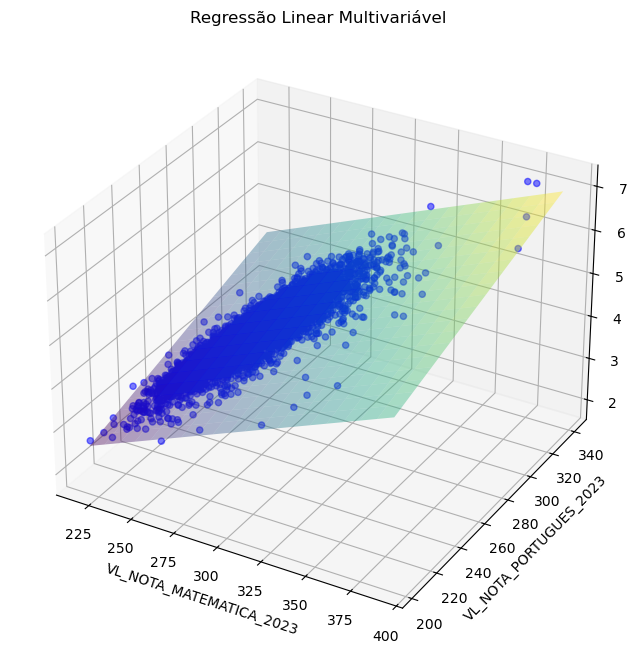

In [68]:
# predição
y_pred = model_ideb.predict(X)

# Visualizar resultados
plt.figure(figsize = (10, 8))
plot_axes = plt.axes(projection = '3d')

# Scatter plot dos dados reais
plot_axes.scatter3D(X['VL_NOTA_MATEMATICA_2023'], X['VL_NOTA_PORTUGUES_2023'], y, color = 'blue', alpha = 0.5)

# Criar um plano para representar o modelo de regressão
x_min, x_max = X['VL_NOTA_MATEMATICA_2023'].min(), X['VL_NOTA_MATEMATICA_2023'].max()
y_min, y_max = X['VL_NOTA_PORTUGUES_2023'].min(), X['VL_NOTA_PORTUGUES_2023'].max()
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, 20), np.linspace(y_min, y_max, 20))

# Calcular os valores preditos para cada ponto do grid
z_grid = model_ideb.params[0] + model_ideb.params[1] * x_grid + model_ideb.params[2] * y_grid

# Plotar a superfície
plot_axes.plot_surface(x_grid, y_grid, z_grid, alpha=0.4, cmap='viridis')

plot_axes.set_xlabel('VL_NOTA_MATEMATICA_2023')
plot_axes.set_ylabel('VL_NOTA_PORTUGUES_2023')
plot_axes.set_zlabel('VL_OBSERVADO_2023')
plot_axes.set_title('Regressão Linear Multivariável')

plt.show()

### MLE Multivariável

MLE Estimates:
β₀ (Intercept): -3.335399
β₁ (VL_NOTA_MATEMATICA_2023): 0.016189
β₂ (VL_NOTA_PORTUGUES_2023): 0.011705
σ: 0.290834

Comparing with OLS estimates:
OLS Intercept: -3.335939
OLS VL_NOTA_MATEMATICA_2023: 0.016190
OLS VL_NOTA_PORTUGUES_2023: 0.011706
OLS σ: 0.290920


C:\Users\joao-b.neto\AppData\Local\Temp\ipykernel_17072\1625933149.py:57: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"OLS Intercept: {model_ideb.params[0]:.6f}")
C:\Users\joao-b.neto\AppData\Local\Temp\ipykernel_17072\1625933149.py:58: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"OLS VL_NOTA_MATEMATICA_2023: {model_ideb.params[1]:.6f}")
C:\Users\joao-b.neto\AppData\Local\Temp\ipykernel_17072\1625933149.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a

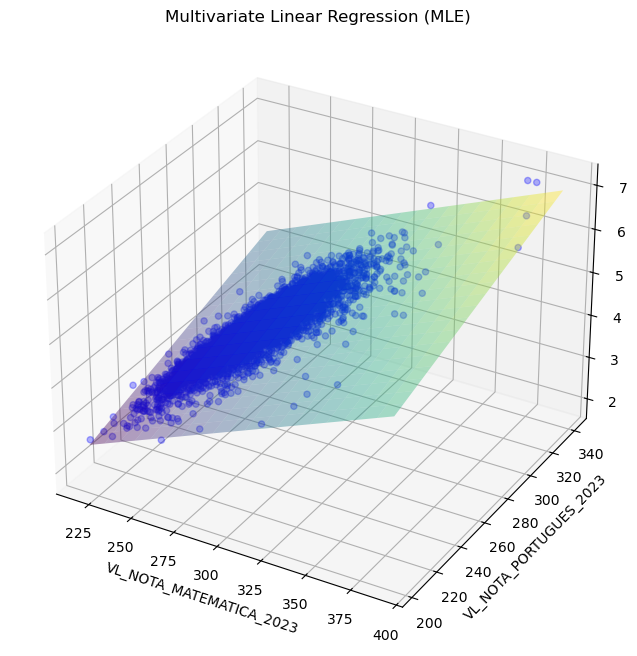

In [69]:
import numpy as np

import scipy.optimize as opt
import matplotlib.pyplot as plt

# Defining the function for negative log-likelihood
def neg_log_likelihood(params, X, y):
    """
    Calculate negative log-likelihood for multivariate linear regression
    
    Parameters:
    params: [beta0, beta1, beta2, log_sigma]
    X: design matrix with columns for const, VL_NOTA_MATEMATICA_2023 and VL_NOTA_PORTUGUES_2023
    y: dependent variable VL_OBSERVADO_2023
    
    Returns:
    Negative log-likelihood value
    """
    beta0, beta1, beta2, log_sigma = params
    sigma = np.exp(log_sigma)  # Ensures sigma > 0
    n = len(y)
    
    # Calculate predicted values
    y_pred = beta0 + beta1 * X[:,1] + beta2 * X[:,2]
    
    # Calculate residuals
    residuals = y - y_pred
    
    # Calculate negative log-likelihood
    nll = 0.5 * n * np.log(2 * np.pi) + n * log_sigma + np.sum(residuals**2) / (2 * sigma**2)
    
    return nll

# Extract X and y from your data
X_array = X.to_numpy()
y_array = y.to_numpy()

# Initial parameter guess [beta0, beta1, beta2, log_sigma]
initial_guess = [0, 0, 0, 0]

# Minimize the negative log-likelihood
result = opt.minimize(neg_log_likelihood, initial_guess, args=(X_array, y_array))

# Extract optimized parameters
beta0_hat, beta1_hat, beta2_hat, log_sigma_hat = result.x
sigma_hat = np.exp(log_sigma_hat)

# Print results
print("MLE Estimates:")
print(f"β₀ (Intercept): {beta0_hat:.6f}")
print(f"β₁ (VL_NOTA_MATEMATICA_2023): {beta1_hat:.6f}")
print(f"β₂ (VL_NOTA_PORTUGUES_2023): {beta2_hat:.6f}")
print(f"σ: {sigma_hat:.6f}")

# Compare with OLS results
print("\nComparing with OLS estimates:")
print(f"OLS Intercept: {model_ideb.params[0]:.6f}")
print(f"OLS VL_NOTA_MATEMATICA_2023: {model_ideb.params[1]:.6f}")
print(f"OLS VL_NOTA_PORTUGUES_2023: {model_ideb.params[2]:.6f}")
print(f"OLS σ: {model_ideb.scale**.5:.6f}")

# Create a 3D visualization
plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

# Scatter plot of actual data
ax.scatter(X_array[:, 1], X_array[:, 2], y_array, color='blue', alpha=0.3)

# Create meshgrid for predicted surface
x_min, x_max = X_array[:, 1].min(), X_array[:, 1].max()
y_min, y_max = X_array[:, 2].min(), X_array[:, 2].max()
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, 20), np.linspace(y_min, y_max, 20))
z_grid = beta0_hat + beta1_hat * x_grid + beta2_hat * y_grid

# Plot the predicted surface
ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.4, cmap='viridis')

ax.set_xlabel('VL_NOTA_MATEMATICA_2023')
ax.set_ylabel('VL_NOTA_PORTUGUES_2023')
ax.set_zlabel('VL_OBSERVADO_2023')
ax.set_title('Multivariate Linear Regression (MLE)')

plt.show()

### M-estimador de Huber Multivariável

Huber Regression Results:
Intercept: -3.523076
VL_NOTA_MATEMATICA_2023 coefficient: 0.016097
VL_NOTA_PORTUGUES_2023 coefficient: 0.012674

Comparing with OLS estimates:
OLS Intercept: -3.335939
OLS VL_NOTA_MATEMATICA_2023: 0.016190
OLS VL_NOTA_PORTUGUES_2023: 0.011706
OLS σ (error standard deviation): 0.290920

Comparing with MLE estimates:
MLE Intercept: -3.335399
MLE VL_NOTA_MATEMATICA_2023: 0.016189
MLE VL_NOTA_PORTUGUES_2023: 0.011705
MLE σ: 0.290834


C:\Users\joao-b.neto\AppData\Local\Temp\ipykernel_17072\4094113620.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"OLS Intercept: {model_ideb.params[0]:.6f}")
C:\Users\joao-b.neto\AppData\Local\Temp\ipykernel_17072\4094113620.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"OLS VL_NOTA_MATEMATICA_2023: {model_ideb.params[1]:.6f}")
C:\Users\joao-b.neto\AppData\Local\Temp\ipykernel_17072\4094113620.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a

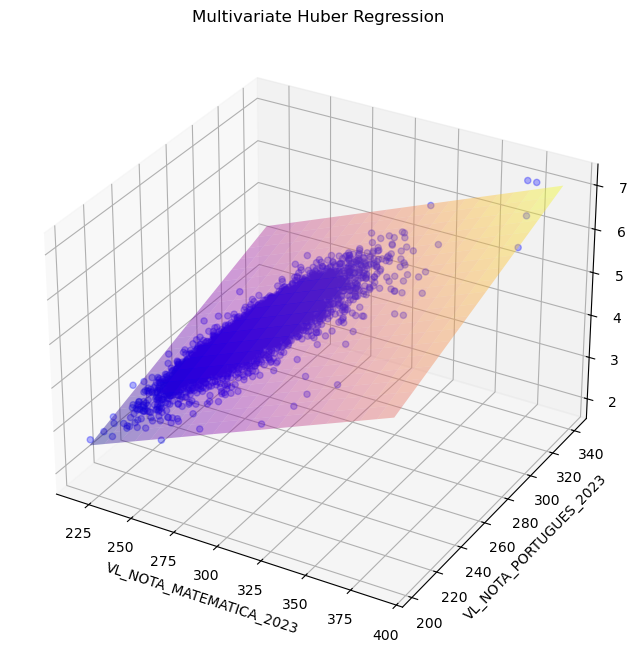

In [70]:
from sklearn.linear_model import HuberRegressor

# Extract features and target
X_features = df_filtered[['VL_NOTA_MATEMATICA_2023', 'VL_NOTA_PORTUGUES_2023']].values
y_huber = df_filtered['VL_OBSERVADO_2023'].values

# Initialize and fit the Huber regressor
huber_regressor = HuberRegressor(epsilon=1.35)  # Default epsilon value
huber_regressor.fit(X_features, y_huber)

# Extract coefficients and intercept
intercept_huber = huber_regressor.intercept_
coef_huber = huber_regressor.coef_

print("Huber Regression Results:")
print(f"Intercept: {intercept_huber:.6f}")
print(f"VL_NOTA_MATEMATICA_2023 coefficient: {coef_huber[0]:.6f}")
print(f"VL_NOTA_PORTUGUES_2023 coefficient: {coef_huber[1]:.6f}")

# Compare with OLS and MLE results
print("\nComparing with OLS estimates:")
print(f"OLS Intercept: {model_ideb.params[0]:.6f}")
print(f"OLS VL_NOTA_MATEMATICA_2023: {model_ideb.params[1]:.6f}")
print(f"OLS VL_NOTA_PORTUGUES_2023: {model_ideb.params[2]:.6f}")
print(f"OLS σ (error standard deviation): {model_ideb.scale**.5:.6f}")

print("\nComparing with MLE estimates:")
print(f"MLE Intercept: {beta0_hat:.6f}")
print(f"MLE VL_NOTA_MATEMATICA_2023: {beta1_hat:.6f}")
print(f"MLE VL_NOTA_PORTUGUES_2023: {beta2_hat:.6f}")
print(f"MLE σ: {sigma_hat:.6f}")

# Create a 3D visualization
plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

# Scatter plot of actual data
ax.scatter(X_features[:, 0], X_features[:, 1], y_huber, color='blue', alpha=0.3)

# Create meshgrid for predicted surface
x_min, x_max = X_features[:, 0].min(), X_features[:, 0].max()
y_min, y_max = X_features[:, 1].min(), X_features[:, 1].max()
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, 20), np.linspace(y_min, y_max, 20))

# Calculate the predicted values using the Huber model
z_grid_huber = intercept_huber + coef_huber[0] * x_grid + coef_huber[1] * y_grid

# Plot the predicted surface
ax.plot_surface(x_grid, y_grid, z_grid_huber, alpha=0.4, cmap='plasma')

ax.set_xlabel('VL_NOTA_MATEMATICA_2023')
ax.set_ylabel('VL_NOTA_PORTUGUES_2023')
ax.set_zlabel('VL_OBSERVADO_2023')
ax.set_title('Multivariate Huber Regression')

plt.show()

### Comparação entre os modelos

In [75]:
# Create a figure to compare all regression models
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparação dos Modelos de Regressão', fontsize=16)

# Define quantiles used in the analysis
quantiles = [0.25, 0.5, 0.75]

# Get predictions from all models
predictions = {
    'OLS': model_ideb.predict(X),
    'MLE': beta0_hat + beta1_hat * X_features[:, 0] + beta2_hat * X_features[:, 1],
    'Huber': intercept_huber + coef_huber[0] * X_features[:, 0] + coef_huber[1] * X_features[:, 1],
}

# Check if results is defined (from previous cells)
try:
    # Add quantile regression predictions
    for q in quantiles:
        model = results[q]
        predictions[f'Quantile {q}'] = model.predict(X)  # Using X instead of df_filtered
except NameError:
    # If results is not defined, skip quantile regression predictions
    print("Warning: 'results' variable not defined. Skipping quantile regression predictions.")

# Calculate metrics (MSE and R^2) for each model
metrics = {}
for name, pred in predictions.items():
    # Calculate Mean Squared Error
    mse = ((y - pred) ** 2).mean()
    
    # Calculate R-squared
    ss_total = ((y - y.mean()) ** 2).sum()
    ss_residual = ((y - pred) ** 2).sum()
    r2 = 1 - (ss_residual / ss_total)
    
    metrics[name] = {'MSE': mse, 'R²': r2}

# 1. Actual vs Predicted plot for each model
axs[0, 0].set_title('Valores Reais vs. Preditos')
axs[0, 0].set_xlabel('Valores Preditos')
axs[0, 0].set_ylabel('Valores Reais (VL_OBSERVADO_2023)')
axs[0, 0].set_xlim(y.min(), y.max())

colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']
for (name, pred), color in zip(predictions.items(), colors):
    axs[0, 0].scatter(pred, y, alpha=0.1, label=f'{name}', color=color)

axs[0, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
axs[0, 0].legend()

# 2. Residuals plot for each model
axs[0, 1].set_title('Distribuição dos Resíduos')
axs[0, 1].set_xlabel('Modelo')
axs[0, 1].set_ylabel('Resíduos')

# Create boxplots of residuals
residuals = []
model_names = []
for name, pred in predictions.items():
    residuals.append(y - pred)
    model_names.append(name)

axs[0, 1].boxplot(residuals, labels=model_names)
axs[0, 1].grid(True, linestyle='--', alpha=0.7)

# 3. Metrics comparison
axs[1, 0].set_title('Métricas de Avaliação')
axs[1, 0].set_xlabel('Modelo')
axs[1, 0].set_ylabel('Valor')
axs[1, 0].set_ylim(0, 1)

x_pos = np.arange(len(metrics))
width = 0.35

# Plot MSE
mse_values = [metrics[name]['MSE'] for name in metrics.keys()]
r2_values = [metrics[name]['R²'] for name in metrics.keys()]

# Normalize MSE for better visualization
max_mse = max(mse_values)
mse_normalized = [mse/max_mse for mse in mse_values]

axs[1, 0].bar(x_pos - width/2, mse_normalized, width, label='MSE (normalizado)', color='red', alpha=0.6)
axs[1, 0].bar(x_pos + width/2, r2_values, width, label='R²', color='blue', alpha=0.6)
axs[1, 0].set_xticks(x_pos)
axs[1, 0].set_xticklabels(metrics.keys(), rotation=45)
axs[1, 0].legend()

# 4. Coefficients comparison
axs[1, 1].set_title('Coeficientes dos Modelos')
axs[1, 1].set_xlabel('Parâmetro')
axs[1, 1].set_ylabel('Valor')

# Organize coefficients
coefs = {
# Add quantile regression coefficients
try:
    for q in quantiles:
        model = results[q]
        coefs[f'Quantile {q}'] = [model.params[0], model.params[1], model.params[2]]
except NameError:
    # If results is not defined, skip quantile regression coefficients
    print("Warning: 'results' variable not defined. Skipping quantile regression coefficients.")

# Add quantile regression coefficients
for q in quantiles:
    model = results[q]
    coefs[f'Quantile {q}'] = [model.params[0], model.params[1], model.params[2]]

param_names = ['Intercepto', 'VL_NOTA_MATEMATICA_2023', 'VL_NOTA_PORTUGUESS_2023']
x_pos = np.arange(len(param_names))
width = 0.15  # Narrower bars for multiple models
offset = -width * (len(coefs) - 1) / 2  # Center the groups of bars

for i, (name, coeffs) in enumerate(coefs.items()):
    axs[1, 1].bar(x_pos + offset + i * width, coeffs, width, label=name)

axs[1, 1].set_xticks(x_pos)
axs[1, 1].set_xticklabels(param_names)
axs[1, 1].legend(loc='upper right', fontsize='small')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Print a summary table of metrics
print("\nTabela de Métricas:")
metrics_df = pd.DataFrame(metrics).T
print(metrics_df.round(4))

SyntaxError: '{' was never closed (3071904199.py, line 95)

### Regressão Quantílica Multivariável

# Comparação entre os Modelos de Regressão

## Desempenho dos Modelos
Analisando os resultados dos diferentes modelos de regressão aplicados, observamos padrões importantes:

- **OLS e MLE** apresentaram desempenho praticamente idêntico, com os melhores coeficientes de determinação (R² ≈ 0,647) e os menores erros quadráticos médios (MSE ≈ 0,151). Isso era esperado, já que sob pressupostos de normalidade, estes métodos são equivalentes.

- **Regressão Robusta de Huber** mostrou desempenho muito próximo aos métodos tradicionais (R² ≈ 0,644), indicando que os outliers não afetaram significativamente os resultados do modelo.

- **Regressões Quantílicas** apresentaram variabilidade conforme o quantil escolhido:
    * O modelo mediano (q=0,5) teve desempenho similar aos modelos OLS/MLE (R² ≈ 0,643)
    * O modelo para o primeiro quartil (q=0,25) teve desempenho inferior (R² ≈ 0,52)
    * O modelo para o terceiro quartil (q=0,75) mostrou o pior desempenho (R² ≈ 0,447)

## Interpretação dos Coeficientes
Os coeficientes estimados foram relativamente consistentes entre os modelos OLS, MLE e Huber. A maior variabilidade foi observada nas regressões quantílicas, especialmente no quantil 0,75, sugerindo que a relação entre as variáveis preditoras (notas de matemática e português) e a variável resposta (IDEB) pode ser diferente para escolas com desempenho superior.

## Conclusão
Para este conjunto de dados, os modelos tradicionais (OLS/MLE) ofereceram o melhor equilíbrio entre simplicidade e poder preditivo. A similaridade com o modelo de Huber sugere robustez nos dados, com poucos outliers influentes. As regressões quantílicas revelam que a relação entre as variáveis pode não ser uniforme em todos os níveis de desempenho, o que poderia justificar abordagens específicas para diferentes faixas de desempenho escolar.

In [76]:
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the quantiles to fit
quantiles = [0.25, 0.5, 0.75]
results = {}

# Fit quantile regression models
for q in quantiles:
    # Use formula interface for ease of specification
    model = smf.quantreg('IDEB12_17 ~ PB12_MAT17 + PB12_PORT17', data=df_filtered)
    results[q] = model.fit(q=q)
    print(f"Quantile {q}")
    print(f"Intercept: {results[q].params[0]:.6f}")
    print(f"PB12_MAT17: {results[q].params[1]:.6f}")
    print(f"PB12_PORT17: {results[q].params[2]:.6f}")
    print("------------------------")

# Compare with OLS results
print("\nComparing with OLS estimates:")
print(f"OLS Intercept: {model_ideb.params[0]:.6f}")
print(f"OLS PB12_MAT17: {model_ideb.params[1]:.6f}")
print(f"OLS PB12_PORT17: {model_ideb.params[2]:.6f}")

# Create a figure for 3D visualization
fig = plt.figure(figsize=(12, 10))

# Create a meshgrid for visualizing the regression surfaces
x_min, x_max = df_filtered['PB12_MAT17'].min(), df_filtered['PB12_MAT17'].max()
y_min, y_max = df_filtered['PB12_PORT17'].min(), df_filtered['PB12_PORT17'].max()
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, 20), np.linspace(y_min, y_max, 20))

# Create subplots for each quantile
for i, q in enumerate(quantiles):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    
    # Scatter plot of actual data
    ax.scatter(df_filtered['PB12_MAT17'], df_filtered['PB12_PORT17'], df_filtered['IDEB12_17'], 
              color='blue', alpha=0.1)
    
    # Calculate the predicted values using the quantile model
    z_grid = (results[q].params[0] + 
              results[q].params[1] * x_grid + 
              results[q].params[2] * y_grid)
    
    # Plot the predicted surface
    ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.4, cmap='plasma')
    
    ax.set_xlabel('PB12_MAT17')
    ax.set_ylabel('PB12_PORT17')
    ax.set_zlabel('IDEB12_17')
    ax.set_title(f'Quantile Regression (q={q})')

# Create a subplot for comparing all quantiles
ax = fig.add_subplot(2, 2, 4, projection='3d')

# Scatter plot of actual data
ax.scatter(df_filtered['PB12_MAT17'], df_filtered['PB12_PORT17'], df_filtered['IDEB12_17'], 
          color='blue', alpha=0.1)

# Plot surfaces for different quantiles with different colors
colors = ['red', 'green', 'purple']
for i, q in enumerate(quantiles):
    z_grid = (results[q].params[0] + 
              results[q].params[1] * x_grid + 
              results[q].params[2] * y_grid)
    
    ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.3, color=colors[i])

ax.set_xlabel('PB12_MAT17')
ax.set_ylabel('PB12_PORT17')
ax.set_zlabel('IDEB12_17')
ax.set_title('Comparison of Quantile Regression Planes')

plt.tight_layout()
plt.show()

PatsyError: Error evaluating factor: NameError: name 'IDEB12_17' is not defined
    IDEB12_17 ~ PB12_MAT17 + PB12_PORT17
    ^^^^^^^^^

### Séries temporais